# <center>Assignment - Advanced Regression
##  <center> House Price Prediction
 Nithin John Jacob

## 1. Introduction

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
The company is looking at prospective properties to buy to enter the market. The company wants to know: 

- Which variables are significant in predicting the price of a house?
- How well those variables describe the price of a house?

In this Assignment, we will use *Multiple Linear Regression* to build a model and understand how the demand varies with the features of dataset. The following steps are used in the analysis.

<font color="green">
- Data reading and understanding<br>
- Data cleaning<br>
- EDA for exploring and feature selection<br>
- Data Preparation<br>
- Model Building<br>
- Alternative Model <br></font>

## 2. Business Objective

* To model the price of houses.
* To understand how exactly the price vary with different features.
* To understand the pricing dynamics of a new market

## 3. Initialize
### 3.1 Import Libraries

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#For Modelling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import scipy.stats as ss

In [4]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### 3.2 Change default settings

In [6]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## 4. Data Reading and Understanding
### 4.1 Import Data

In [7]:

#import the data set
df = pd.read_csv('train.csv', index_col=0, low_memory=False)

In [8]:
#import the data dict for reference
with open('data_description.txt') as f:
    lines = f.readlines()
    
pattern1 = r'\s*(\S+): (.+)\s*\n'
pattern2 = r'\s+(\S+)\s+(.+\S)\s*\n'
metadata= {}
for line in lines:
    m = re.match(pattern1,line)
    if m:
        feature = m[1]
        desc = m[2]
        metadata.update({feature:{'desc' : desc, 'vals':{} }
                         })
        continue
    p = re.match(pattern2, line)
    if p:
        metadata[feature]['vals'].update({p[1]:p[2]})

In [9]:
# display some metadata
metadata['MSSubClass']

{'desc': 'Identifies the type of dwelling involved in the sale.\t',
 'vals': {'20': '1-STORY 1946 & NEWER ALL STYLES',
  '30': '1-STORY 1945 & OLDER',
  '40': '1-STORY W/FINISHED ATTIC ALL AGES',
  '45': '1-1/2 STORY - UNFINISHED ALL AGES',
  '50': '1-1/2 STORY FINISHED ALL AGES',
  '60': '2-STORY 1946 & NEWER',
  '70': '2-STORY 1945 & OLDER',
  '75': '2-1/2 STORY ALL AGES',
  '80': 'SPLIT OR MULTI-LEVEL',
  '85': 'SPLIT FOYER',
  '90': 'DUPLEX - ALL STYLES AND AGES',
  '120': '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  '150': '1-1/2 STORY PUD - ALL AGES',
  '160': '2-STORY PUD - 1946 & NEWER',
  '180': 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
  '190': '2 FAMILY CONVERSION - ALL STYLES AND AGES'}}

### 4.2 Explore Data

In [10]:
#Check for data and null
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 5. Data Cleaning

### 5.1 Missing Value Treatment

We remove any duplicate rows

In [12]:
#check for duplicated rows
sum(df.duplicated())

0

In [13]:
#Check for all empty rows
df[df.isnull().sum(axis=1)==len(df.columns)]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [14]:
df.columns[df.isnull().sum(axis=0)==len(df.index)]

Index([], dtype='object')

<font color="green"> **Insights**</font><br>
<font color="purple">
    - No Rows are empty. <br>
    - No columns are empty.<br>
    - No Duplicated Rows.
</font>

In [15]:
#Check for incomplete columns
columns = df.columns[df.isnull().sum()!=0]
df[columns].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

we will check one by one
- Electrical : Electrical system        

In [16]:
#we will replace the null of Electrical column by the most frequent for similar class and zoning
cols2 = ['MSSubClass','MSZoning']
a=df[cols2][df.Electrical.isnull()]
ind = df.apply(lambda row: all([row[col] == a.iloc[0][col] for col in cols2]),  axis=1)
df.Electrical.fillna(df['Electrical'][ind].mode(), inplace=True)

The data dictionary states:
We will impute one by one.

In [17]:
#PoolQC
#we will check the PoolArea for rows that miss PoolQC
df[['PoolArea','PoolQC']].value_counts()

PoolArea  PoolQC
480       Gd        1
512       Ex        1
519       Fa        1
555       Ex        1
576       Gd        1
648       Fa        1
738       Gd        1
dtype: int64

The variance of PoolQC is very bad. It will add very less. We will remove the feature later.

In [18]:
#Function to giveen value counts of multiple columns
def combine_value_counts(df):
    countdict = {col: pd.Series([f"{feature} : {count}" 
                                for feature, count in df[col].value_counts().items()]) 
                                for col in df.columns}
    
    return pd.concat(countdict, axis=1).fillna('-')
                 

Some features have NA as a category indicating the absence of certain features. Pandas is reading them as null. We will convert back to String 'NA'.


In [19]:
cols_with_na = ["Alley", "BsmtQual", "BsmtCond", 
                "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                "FireplaceQu", "GarageType", "GarageFinish", 
                "GarageQual", "GarageCond", "Fence", "MiscFeature"]
df["MasVnrType"].fillna("None", inplace=True)
for col in cols_with_na:
    df[col].fillna("NA", inplace=True)
cols_with_na.append("MasVnrType")

In [20]:
combine_value_counts(df[cols_with_na])

Alley  BsmtQual   BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0  NA : 1369  TA : 649  TA : 1311     No : 953    Unf : 430   Unf : 1256   
1  Grvl : 50  Gd : 618    Gd : 65     Av : 221    GLQ : 418     Rec : 54   
2  Pave : 41  Ex : 121    Fa : 45     Gd : 134    ALQ : 220     LwQ : 46   
3          -   NA : 37    NA : 37     Mn : 114    BLQ : 148      NA : 38   
4          -   Fa : 35     Po : 2      NA : 38    Rec : 133     BLQ : 33   
5          -         -          -            -     LwQ : 74     ALQ : 19   
6          -         -          -            -      NA : 37     GLQ : 14   

  FireplaceQu    GarageType GarageFinish GarageQual GarageCond        Fence  \
0    NA : 690  Attchd : 870    Unf : 605  TA : 1311  TA : 1326    NA : 1179   
1    Gd : 380  Detchd : 387    RFn : 422    NA : 81    NA : 81  MnPrv : 157   
2    TA : 313  BuiltIn : 88    Fin : 352    Fa : 48    Fa : 35   GdPrv : 59   
3     Fa : 33       NA : 81      NA : 81    Gd : 14     Gd : 9    GdWo : 54   
4     Ex : 24  Basment : 19            -     Ex : 3     Po : 7    MnWw : 11   
5     Po : 20   CarPort : 9            -     Po : 3     Ex : 2            -   
6           -    2Types : 6            -          -          -            -   

  MiscFeature     MasVnrType  
0   NA : 1406     None : 872  
1   Shed : 49  BrkFace : 445  
2    Gar2 : 2    Stone : 128  
3    Othr : 2    BrkCmn : 15  
4    TenC : 1              -  
5           -              -  
6           -              -

We fill the electrical value by the most frequent for same type of building.


In [21]:
df[df['Electrical'].isnull()][['Electrical','MSSubClass']]

Electrical  MSSubClass
Id                         
1380        NaN          80

In [22]:
val = df[(df.MSSubClass == 80)]['Electrical'].mode()
print(val)
df.Electrical.fillna('SBrkr', inplace=True)

0    SBrkr
dtype: object


Since Garage was never built we will equate it to the oldest value.

In [23]:
df.GarageYrBlt.fillna(df.GarageYrBlt.min(), inplace=True)

We are assuming MasVnrType is None, The Area must be 0.

In [24]:
df[df.MasVnrArea ==0][['MasVnrType','MasVnrArea']].value_counts()#[df.MasVnrType.isnull()]

MasVnrType  MasVnrArea
None        0.0           859
BrkFace     0.0             1
Stone       0.0             1
dtype: int64

In [25]:
df.MasVnrArea.fillna(0,inplace=True)
df.columns[df.isnull().sum()!=0]

Index(['LotFrontage', 'PoolQC'], dtype='object')

We will fill the LotFrontage with median value of houses from similar neighborhood.

In [26]:
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [27]:
#confirm there are no more null values
df.isnull().sum().sum()

1453

<font color="green"> **Insights**</font><br>
<font color="purple">
    - We replaced the missing values of some of the columns with None/NA indicating the absence of those features. "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "Fence", "MiscFeature"] <br>
    - We replaced the electical missingvalue with the most common value in same MSSubClass .<br>
    - We replaced the MasVnrArea missing value with 0.<br>
    - We replaced the LotFrontage missing value with median value of LotFrontage from the same Neighborhood.<br>
    - We have identtified that poolQC is to be removed.<br>
</font>

### 5.2 Standardize the Data columns

**We will first identify the nominal, ordinal and numerical data.**

In [28]:
#We can assume all features that have specific values in data set as categorical.
cat_cols = [feature for feature, d in metadata.items()
             if d['vals']]
print(cat_cols)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [29]:
# We find the numerical columns by using the metadata. Basically Metadata without any values listed are numerical values.
inter_cols = [feature for feature, d in metadata.items()
             if not d['vals']]
print(inter_cols)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [30]:
# We will identify numeric and non numeric columns
num_cols = df.select_dtypes('number').columns
print([col for col in inter_cols if col not in num_cols])
print([col for col in num_cols if col not in inter_cols])
inter_cols.remove('Bedroom')
inter_cols.remove('Kitchen')
inter_cols.extend(['BedroomAbvGr', 'KitchenAbvGr','SalePrice'])

['Bedroom', 'Kitchen']
['MSSubClass', 'OverallQual', 'OverallCond', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice']


Some of the numeric columns classified as inter_cols maybe ordinal. We will classify all coulmns having less than 20 value counts as ordinal.

In [31]:
ord_cols1 = [col for col in inter_cols if len(df[col].value_counts()) <20]
print('Ordinal Features :', ord_cols1)
for col in ord_cols1:
    inter_cols.remove(col)
print('Cardinal Features :', inter_cols)

Ordinal Features : ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold', 'BedroomAbvGr', 'KitchenAbvGr']
Cardinal Features : ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


 -------------------------------------------------------------------------------------
<font color="green"> **Insights**</font><br>
<font color="purple">
    - The names in database are BedroomAbvGr  KitchenAbvGr  but in data dictionary are Bedroom and Kitchen. <br>
    - The columns 'MSSubClass', 'OverallQual', 'OverallCond' all though numeric are categorical. <br>

</font>

-------------------------------------------------------------------------------------

We will identify the other ordinal features with the help of metadata.

In [32]:
#first we wil identify the columns with same values
#We will use the data dict to tabbulate the possible values of categorical features to help us identify if it is nominal or ordinal.
dd={}
for col in cat_cols:
    val = tuple(metadata[col]['vals'])
    if dd.get(val):
        dd[val].append(col)
    else:
        dd[val]=[col]

print('Common Values:')
for k,v in dd.items():
    if len(v)>1:
         print(f"{k} : {v}")
print('\n\nUnique values:')
for k,v in dd.items():
     if len(v)<=1:
        print(f"{k} : {v}")

Common Values:
('Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe') : ['Condition1', 'Condition2']
('10', '9', '8', '7', '6', '5', '4', '3', '2', '1') : ['OverallQual', 'OverallCond']
('AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd', 'WdShing') : ['Exterior1st', 'Exterior2nd']
('Ex', 'Gd', 'TA', 'Fa', 'Po') : ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
('Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA') : ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
('GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA') : ['BsmtFinType1', 'BsmtFinType2']


Unique values:
('20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '150', '160', '180', '190') : ['MSSubClass']
('A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM') : ['MSZoning']
('Grvl', 'Pave') : ['Street']
('Grvl', 'Pave', 'NA') : ['Alley']
('Reg', 'IR1', 'IR2', 'IR3') : ['LotShape'

In [33]:
#The possible ordinal columns are
ord_cols2 = ['OverallQual', 'OverallCond','ExterQual','ExterCond','HeatingQC',
            'KitchenQual','BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual',
            'GarageCond','BsmtFinType1', 'BsmtFinType2', 'LotShape', 'LandContour',
            'Utilities','LandSlope','BsmtExposure','CentralAir','GarageFinish',
            'PavedDrive','Fence','PoolQC']
ord_cols = ord_cols1 + ord_cols2
nom_cols = [col for col in cat_cols if col not in ord_cols]
cat_cols = nom_cols + ord_cols
print('Categorical Columns:')
print('Nominal columns :', nom_cols)
print('\nOrdinal columns :', ord_cols)
print('\ninterval columns :', inter_cols)
print('\nNumber of categorical columns:', len(cat_cols))
print('    Number of ordinal columns:', len(ord_cols))
print('    Number of nominal columns:', len(nom_cols))

print('Number of numerical columns:', len(inter_cols))
print('Total Number of coulmns:' ,len(cat_cols)+len(inter_cols))

Categorical Columns:
Nominal columns : ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

Ordinal columns : ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BsmtExposure', 'CentralAir', 'GarageFinish', 'PavedDrive', 'Fence', 'PoolQC']

interval columns : ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlr

-------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - We have segregated the data to ordinal, nominal and numerical features.<br>
 - There are 80 columns.
    </font>
    
-------------------------------------------------------------------------------------

In [34]:
#we add an I infront to indicate this as a categorical column
df['MSSubClass'] = df['MSSubClass'].apply(lambda x: f'I{x}')

we will convert nominal and ordinal to categorical data

In [35]:
df[ord_cols] = df[ord_cols].astype("category")
df[nom_cols] = df[nom_cols].astype("category")

In [36]:
#Set as ordered categorical for ordinal data. The order is reverse of what is given in metadata
for col in ord_cols:
    if col not in num_cols:
        df[col] = df[col].cat.set_categories(reversed(metadata[col]['vals'].keys()), ordered=True)

In [37]:
df[ord_cols].describe()

BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  TotRmsAbvGrd  \
count           1460          1460      1460      1460          1460   
unique             4             3         4         3            12   
top                0             0         2         0             6   
freq             856          1378       768       913           402   

        Fireplaces  GarageCars  PoolArea  MoSold  YrSold  BedroomAbvGr  \
count         1460        1460      1460    1460    1460          1460   
unique           4           5         8      12       5             8   
top              0           2         0       6    2009             3   
freq           690         824      1453     253     338           804   

        KitchenAbvGr  OverallQual  OverallCond ExterQual ExterCond HeatingQC  \
count           1460         1460         1460      1460      1460      1460   
unique             4           10            9         4         5         5   
top                1            5            5        TA        TA        Ex   
freq            1392          397          821       906      1282       741   

       KitchenQual BsmtQual BsmtCond FireplaceQu GarageQual GarageCond  \
count         1460     1460     1460        1460       1460       1460   
unique           4        5        5           6          6          6   
top             TA       TA       TA          NA         TA         TA   
freq           735      649     1311         690       1311       1326   

       BsmtFinType1 BsmtFinType2 LotShape LandContour Utilities LandSlope  \
count          1460         1460     1460        1460      1460      1460   
unique            7            7        4           4         2         3   
top             Unf          Unf      Reg         Lvl    AllPub       Gtl   
freq            430         1256      925        1311      1459      1382   

       BsmtExposure CentralAir GarageFinish PavedDrive Fence PoolQC  
count          1460       1460         1460       1460  1460      7  
unique            5          2            4          3     5      3  
top              No          Y          Unf          Y    NA     Gd  
freq            953       1365          605       1340  1179      3

We can remove some features because the the values of those variables are mostly one value. It may not add anything to model.

In [38]:
#Convert to numeric
for col in ord_cols:
    df[col] = df[col].cat.codes

In [39]:
df[ord_cols].describe()

BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  TotRmsAbvGrd  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      4.517123   
std        0.518911      0.238753     0.550916     0.502885      1.622446   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      3.000000   
50%        0.000000      0.000000     2.000000     0.000000      4.000000   
75%        1.000000      0.000000     2.000000     1.000000      5.000000   
max        3.000000      2.000000     3.000000     2.000000     11.000000   

        Fireplaces   GarageCars     PoolArea       MoSold       YrSold  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014     1.767123     0.019178     5.321918     1.815753   
std       0.644666     0.747315     0.309173     2.703626     1.328095   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     4.000000     1.000000   
50%       1.000000     2.000000     0.000000     5.000000     2.000000   
75%       1.000000     2.000000     0.000000     7.000000     3.000000   
max       3.000000     4.000000     7.000000    11.000000     4.000000   

       BedroomAbvGr  KitchenAbvGr  OverallQual  OverallCond   ExterQual  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.00000   
mean       2.865753      1.046575     5.099315     4.575342     2.39589   
std        0.811875      0.220338     1.382997     1.112799     0.57428   
min        0.000000      0.000000     0.000000     0.000000     1.00000   
25%        2.000000      1.000000     4.000000     4.000000     2.00000   
50%        3.000000      1.000000     5.000000     4.000000     2.00000   
75%        3.000000      1.000000     6.000000     5.000000     3.00000   
max        7.000000      3.000000     9.000000     8.000000     4.00000   

         ExterCond    HeatingQC  KitchenQual     BsmtQual     BsmtCond  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      2.083562     3.145205     2.511644     3.489041     2.934932   
std       0.351054     0.959501     0.663760     0.876478     0.552159   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       2.000000     2.000000     2.000000     3.000000     3.000000   
50%       2.000000     4.000000     2.000000     4.000000     3.000000   
75%       2.000000     4.000000     3.000000     4.000000     3.000000   
max       4.000000     4.000000     4.000000     5.000000     4.000000   

       FireplaceQu   GarageQual   GarageCond  BsmtFinType1  BsmtFinType2  \
count  1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean      1.825342     2.810274     2.808904      3.545890      1.247260   
std       1.810877     0.722898     0.719685      2.107776      0.892332   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     3.000000     3.000000      1.000000      1.000000   
50%       2.000000     3.000000     3.000000      4.000000      1.000000   
75%       4.000000     3.000000     3.000000      6.000000      1.000000   
max       5.000000     5.000000     5.000000      6.000000      6.000000   

          LotShape  LandContour    Utilities    LandSlope  BsmtExposure  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean      2.591781     2.814384     2.998630     1.937671      1.630137   
std       0.582296     0.606509     0.052342     0.276232      1.067391   
min       0.000000     0.000000     1.000000     0.000000      0.000000   
25%       2.000000     3.000000     3.000000     2.000000      1.000000   
50%       3.000000     3.000000     3.000000     2.000000      1.000000   
75%       3.000000     3.000000     3.000000     2.000000      2.000000   
max       3.000000

## 6 EDA and Feature Selection

We will see the target variable.

In [40]:
def my_dist_plot(y):
    """Function to plot Q-Q plot and Distribution."""
    fig, axs = plt.subplots(1,2, figsize=(16,6))
    axs=axs.flatten()
    sm.qqplot(data=y, line='45',ax=axs[0], fit =True)
    axs[0].set_title('Q-Q plot for SalePrice')
    sns.distplot(y, ax=axs[1])
    axs[1].set_title('Distribution of SalePrice')

### 6.1 Target Variable

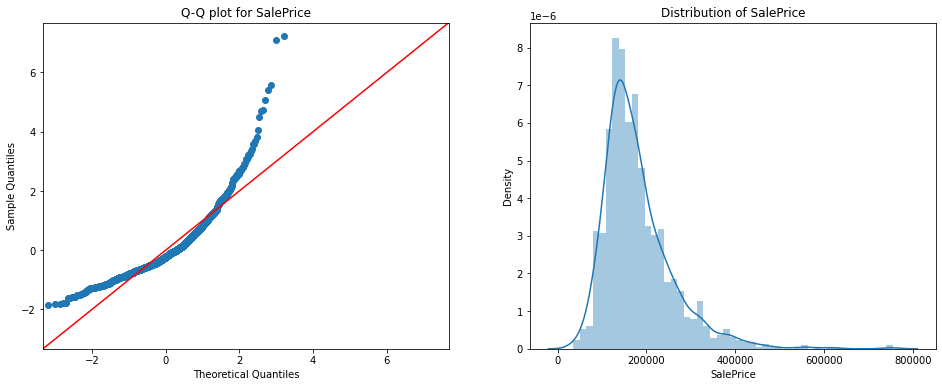

In [41]:
my_dist_plot(df['SalePrice'])

Since the values are very much spread out and their is skewness in data , we can do a log transformation for SalePrice

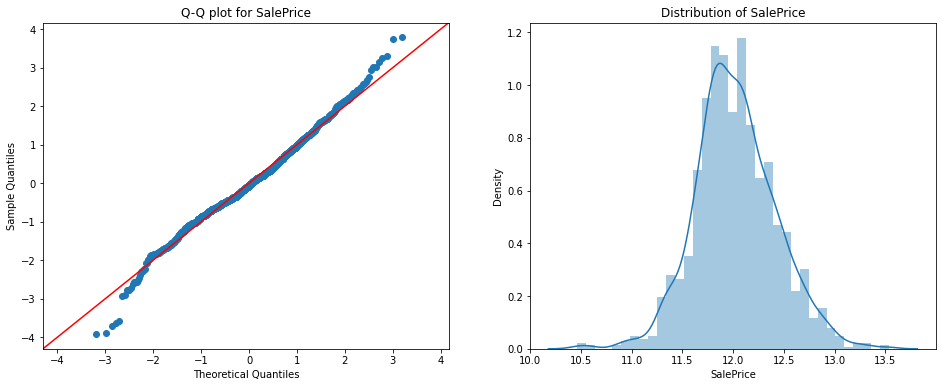

In [42]:
y = np.log(df['SalePrice'])
my_dist_plot(y)

In [43]:
df['SalePrice'] = y

-------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - We haveseen the distribution of target variable. It is a skewd distribution.<br>
 - We have applied log transform on it to make the inferance easy.
</font>
    
-------------------------------------------------------------------------------------

### 6.2 Helper functions for Visualization

We will create some helpher function to facilitate easy plotting.

In [44]:
#Plot functions for EDA

def plot_scatter(df, collist, target='SalePrice'):
    """Plots Scatter plot between columns. and target"""
    li  = len(collist)
    n = int(np.ceil(np.sqrt(li)))
    n2 = int(np.ceil(li/n))
    fig, axs = plt.subplots(n2, n, figsize=(18,10))
    axs = axs.flatten()
    for ax in axs[li:]:
        ax.remove()
    for ax, col in zip(axs, collist):
        ax.scatter(x=df[col],y=df[target])
        ax.set_xlabel(col)
        ax.set_ylabel(target)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.4, wspace=0.2)
    plt.suptitle(f'Relationship of {target} with Numeric Features')
    plt.tight_layout()

def plot_dist(df):
    """Plots distribution of numeric columns."""
    collist = df.columns
    li  = len(collist)
    n = int(np.ceil(np.sqrt(li)))
    n2 = int(np.ceil(li/n))
    fig, axs = plt.subplots(n2, n, figsize=(18,10))
    axs = axs.flatten()
    for ax in axs[li:]:
        ax.remove()
    for ax, col in zip(axs, collist):
        sns.histplot(data=df, x=col, kde=True, ax=ax)
        y1,y2=ax.get_ylim()
        range = y2-y1
        ax.boxplot(x=df[col], vert=False, positions=[y1 + 0.8*range], widths= 0.2*range, labels=[''])
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.4, wspace=0.2)
    plt.suptitle('Distribution of Features', fontsize='x-large', fontweight='bold')
    plt.tight_layout()

def plot_count(df):
    """Distribution of categorical data."""
    collist = df.columns
    li  = len(collist)
    n = int(np.ceil(np.sqrt(li)))
    n2 = int(np.ceil(li/n))
    fig, axs = plt.subplots(n2, n, figsize=(18,10))
    axs = axs.flatten()
    for ax in axs[li:]:
        ax.remove()
    for ax, col in zip(axs, collist):
        sns.countplot(data=df, x=col,  ax=ax)
        _=ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right')
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.4, wspace=0.2)
    plt.suptitle('Distribution of Categorical Features.')
    plt.tight_layout()
    
def plot_bar(df, collist, target="SalePrice"):
    """Plots counts of nominal columns."""
    li  = len(collist)
    n = int(np.ceil(np.sqrt(li)))
    n2 = int(np.ceil(li/n))
    fig, axs = plt.subplots(n2, n, figsize=(18,10))
    axs = axs.flatten()
    for ax in axs[li:]:
        ax.remove()
    for ax, col in zip(axs, collist):
        sns.barplot(data=df, x=col, y=target,  ax=ax, estimator=np.median)
        _=ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right')
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.4, wspace=0.2)
    plt.suptitle('Median SalePrice for Categories')
    plt.tight_layout()

def plot_qq(df):
    """Plots QQ plot."""
    collist = df.columns
    li  = len(collist)
    n = int(np.ceil(np.sqrt(li)))
    n2 = int(np.ceil(li/n))
    fig, axs = plt.subplots(n2, n, figsize=(18,10))
    axs = axs.flatten()
    for ax in axs[li:]:
        ax.remove()
    for ax, col in zip(axs, collist):
        sm.qqplot(data=df[col], line='45',ax=ax, fit =True)
        ax.set_title(col)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.4, wspace=0.2)
    plt.suptitle('Q_Q plot for Features')
    plt.tight_layout()


### 6.3 Numerical Columns Distribution

We will see the distribution of each feature and remove the ones with less variance.

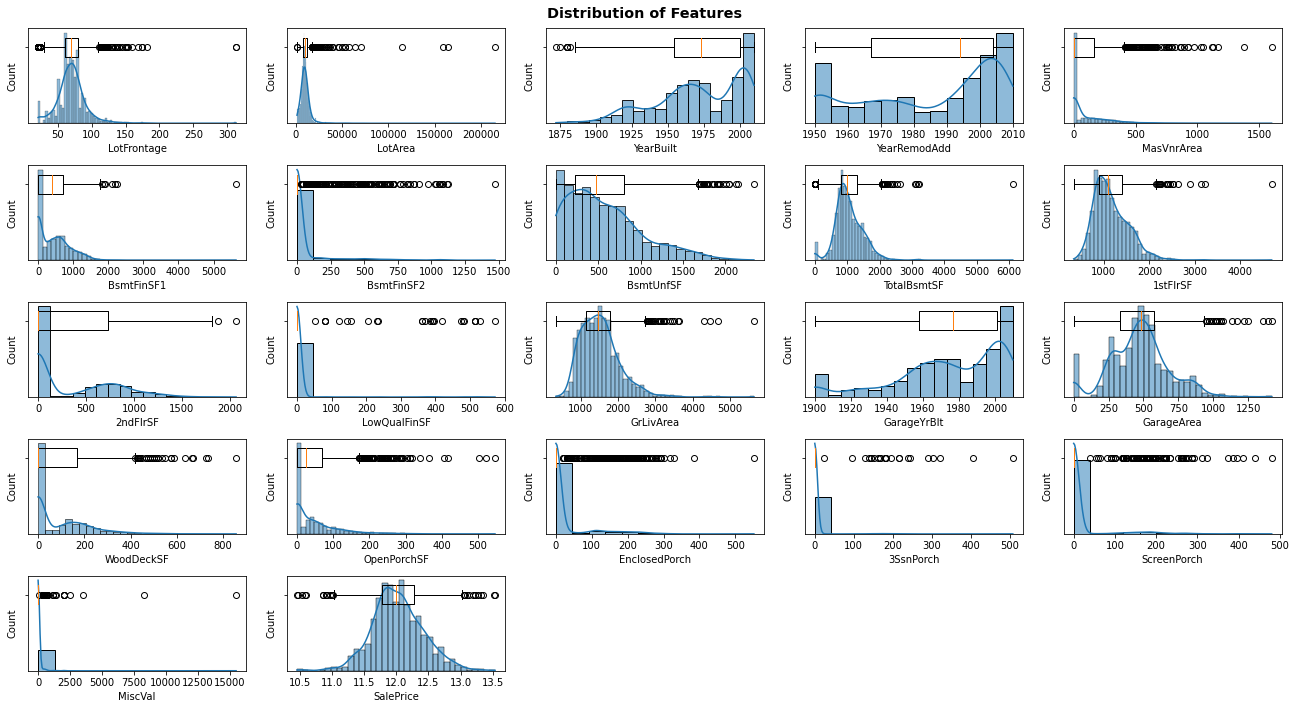

In [45]:
plot_dist(df[inter_cols])

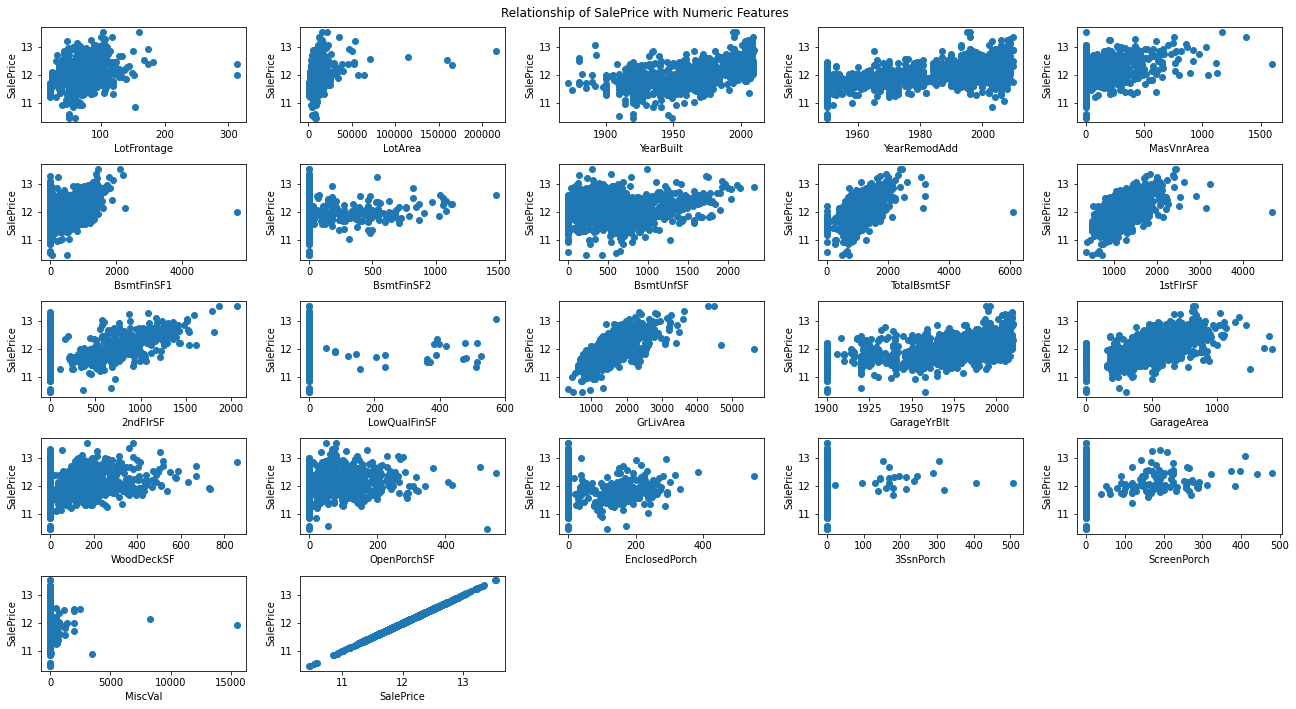

In [46]:
#See the relation to sales column
plot_scatter(df, inter_cols, target='SalePrice')

In [47]:
#Remove 2 highest value from LotFrontage.
remove_indx = set(df.LotFrontage.sort_values(ascending=False).index[0:2])
#Remove 6 highest value from LotArea.
remove_indx .update(df.LotArea.sort_values(ascending=False).index[0:6])
#Remove 2 highest value from MasVnrArea.
remove_indx .update(df.MasVnrArea.sort_values(ascending=False).index[0:2])
#Remove 1 highest value from BsmtFinSF1.
remove_indx .update(df.BsmtFinSF1.sort_values(ascending=False).index[0:1])
#Remove 1 highest value from BsmtFinSF2.
remove_indx .update(df.BsmtFinSF2.sort_values(ascending=False).index[0:1])
#Remove 1 highest value from TotalBsmtSF.
remove_indx .update(df.TotalBsmtSF.sort_values(ascending=False).index[0:1])
#Remove 4 highest value from 1stFlrSF.
remove_indx .update(df['1stFlrSF'].sort_values(ascending=False).index[0:4])

#Remove 4 highest value from GrLivArea.
remove_indx .update(df.GrLivArea.sort_values(ascending=False).index[0:4])
#Remove 4 highest value from GarageArea.
remove_indx .update(df.GarageArea.sort_values(ascending=False).index[0:4])
#Remove 3 highest value from WoodDeckSF.
remove_indx .update(df.WoodDeckSF.sort_values(ascending=False).index[0:3])
#Remove 3 highest value from OpenPorchSF.
remove_indx .update(df.OpenPorchSF.sort_values(ascending=False).index[0:3])
#Remove 2 highest value from EnclosedPorch.
remove_indx .update(df.EnclosedPorch.sort_values(ascending=False).index[0:2])
#Remove 3 highest value from MiscVal.
remove_indx .update(df.MiscVal.sort_values(ascending=False).index[0:3])
print('Rows to remove :' , remove_indx )
print('Number of Rows :' ,len(remove_indx))
df = df.drop(index=remove_indx)

Rows to remove : {1025, 524, 1170, 1299, 1183, 1062, 935, 1191, 298, 1069, 1329, 692, 1460, 54, 314, 706, 707, 452, 323, 582, 198, 584, 1231, 336, 347, 748, 496, 497, 250}
Number of Rows : 29


We will see the relationship after removal of outliers.

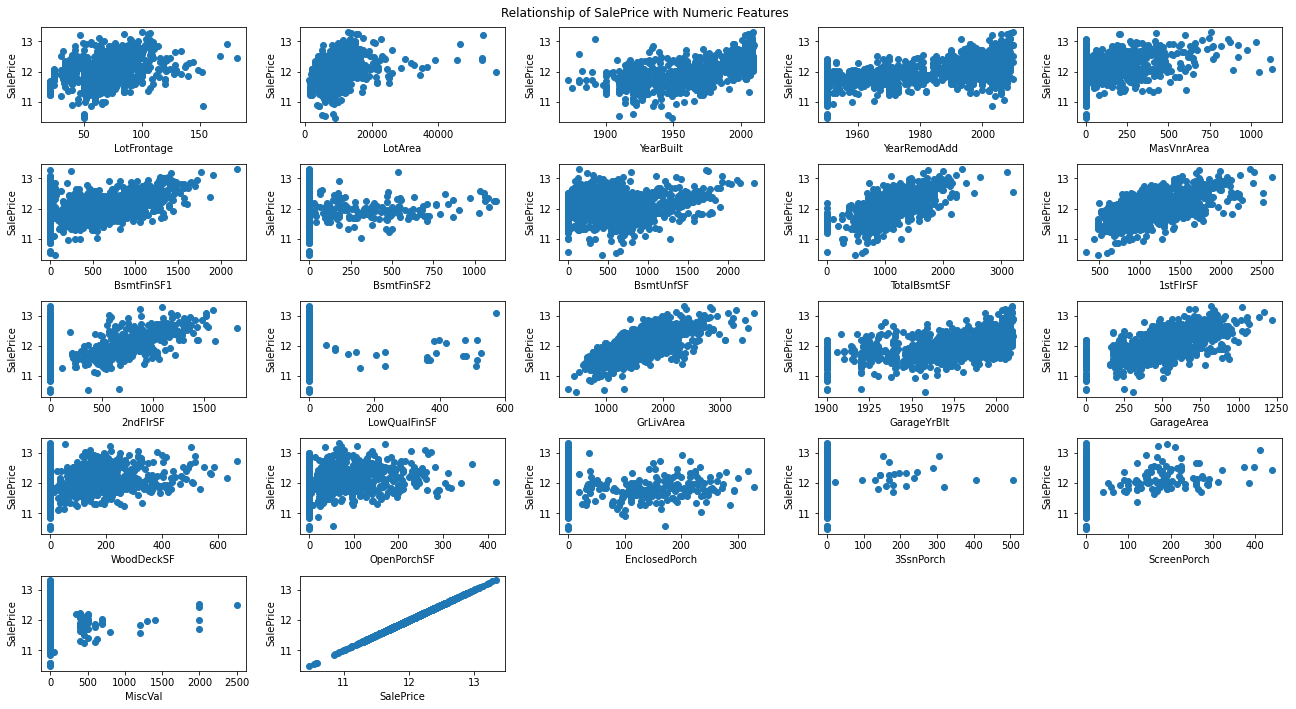

In [48]:
plot_scatter(df, inter_cols, target='SalePrice')

We will see Q-Qplot to see if distributions are normal.

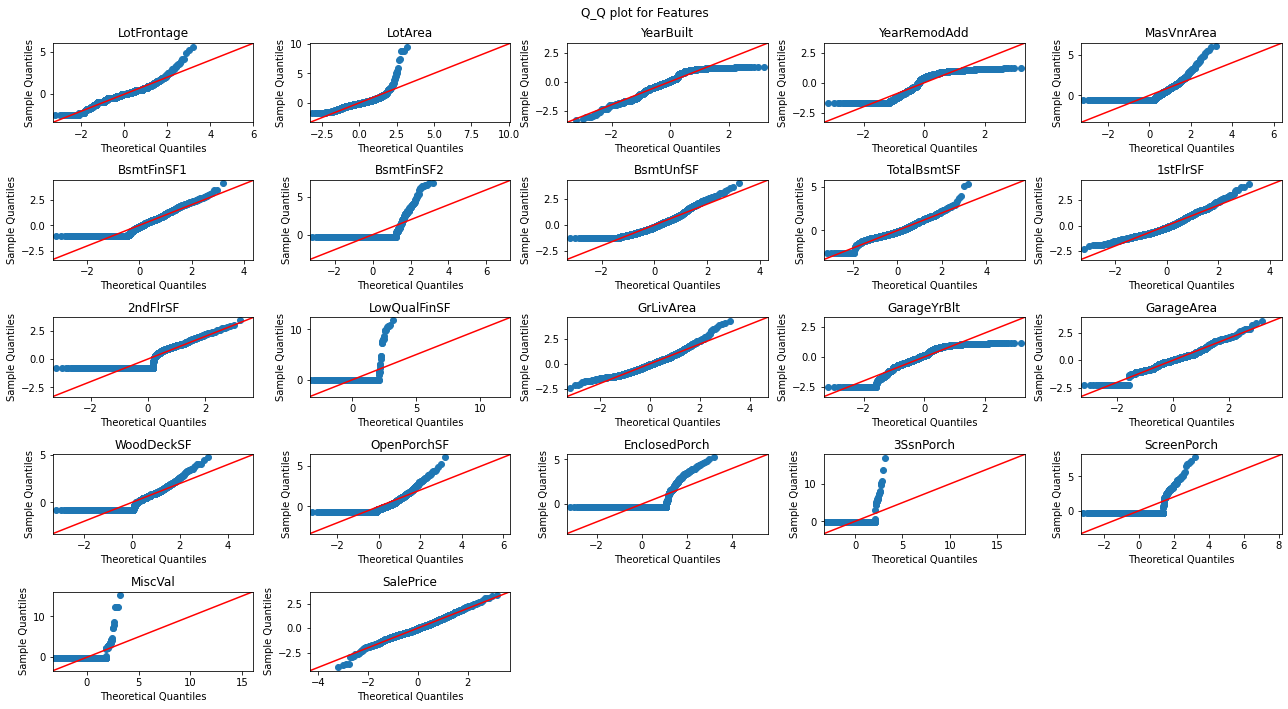

In [49]:
plot_qq(df[inter_cols])

In [50]:
ommitted_cols = []
cols_to_remove = ['LowQualFinSF','MiscVal','3SsnPorch','ScreenPorch']
#df = df.drop(columns=cols_to_remove)
for col in cols_to_remove:
    inter_cols.remove(col)
ommitted_cols.extend(cols_to_remove)

------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - Distribution and relationhip of numerical columns with saleprice columns was studied.<br>
 - 29 rows containing outliers were removed.<br>
 - Many of the Features donot follow a normal distribution.<br>
 - Features 'LowQualFinSF','MiscVal','3SsnPorch','ScreenPorch' are removed because of very low variance, 
</font>

-------------------------------------------------------------------------------------

### 6.4 Ordinal Columns Distribution

We will continue the process for ordinal coulmns

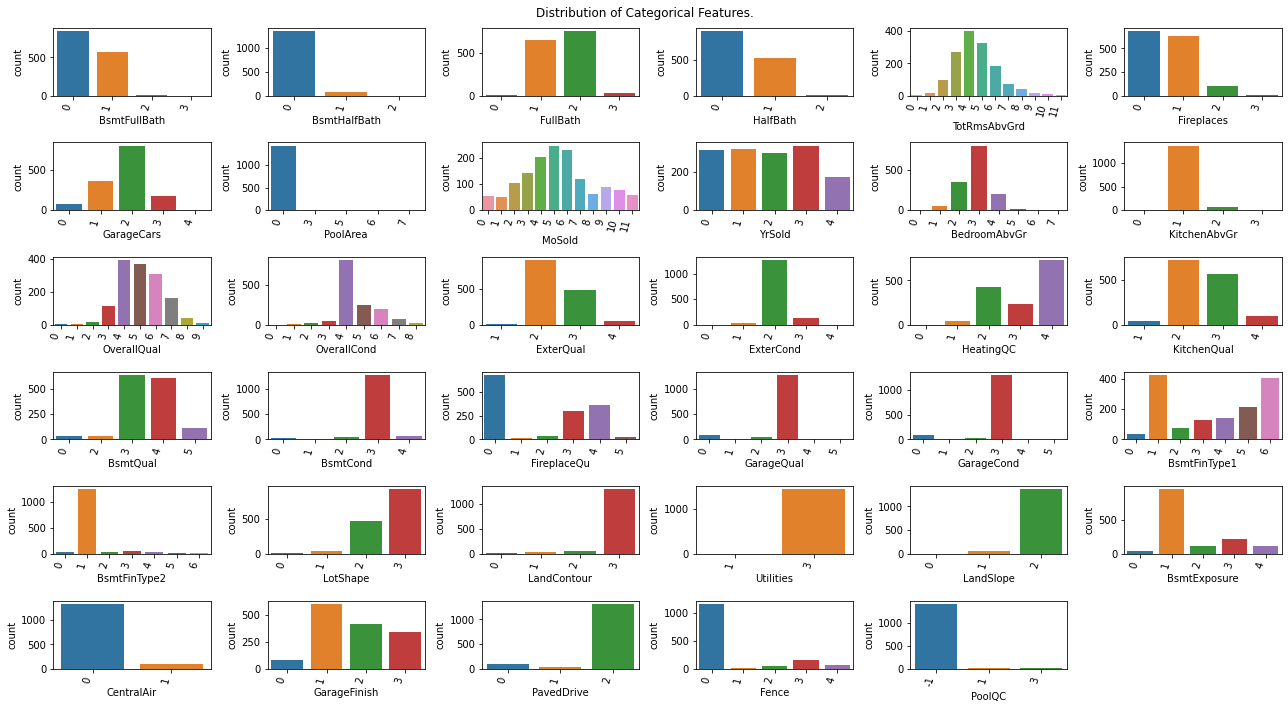

In [51]:
plot_count(df[ord_cols])

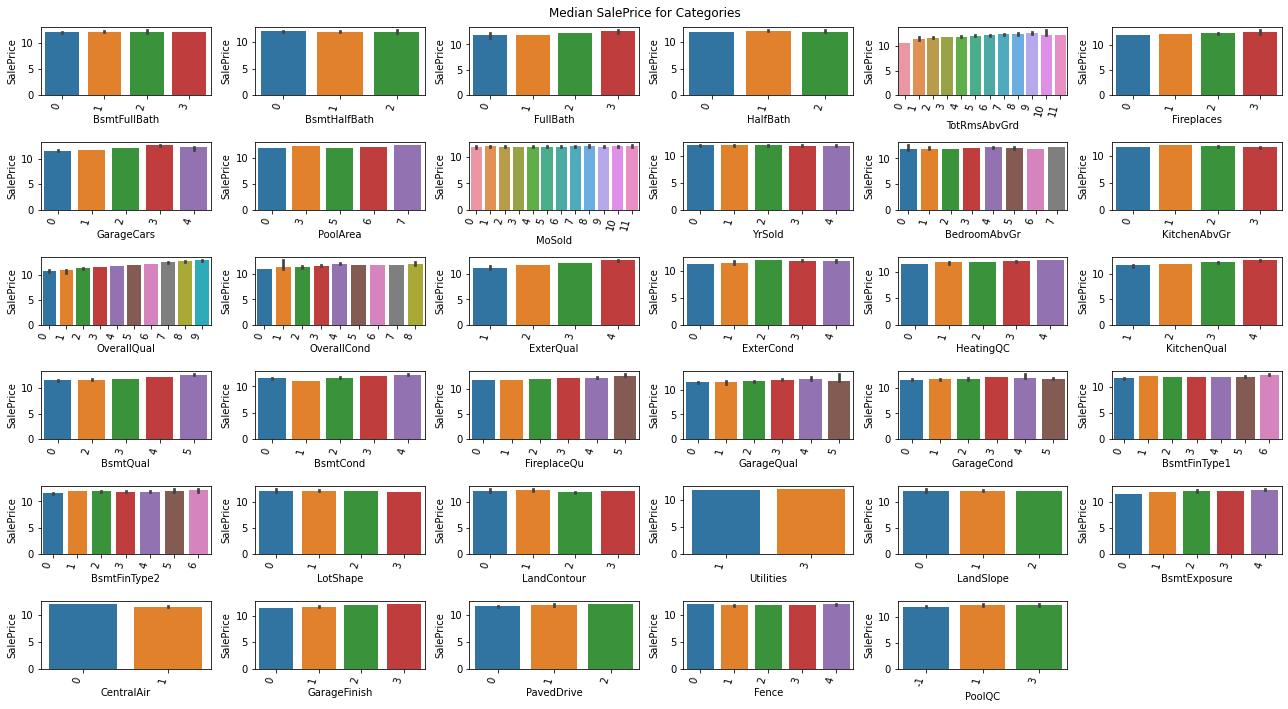

In [52]:
plot_bar(df, ord_cols, 'SalePrice')

In [53]:
combine_value_counts(df[ord_cols])

BsmtFullBath BsmtHalfBath FullBath HalfBath TotRmsAbvGrd Fireplaces  \
0       0 : 844     0 : 1352  2 : 752  0 : 898      4 : 400    0 : 685   
1       1 : 575       1 : 77  1 : 644  1 : 522      5 : 324    1 : 635   
2        2 : 11        2 : 2   3 : 27   2 : 11      3 : 271    2 : 107   
3         3 : 1            -    0 : 8        -      6 : 181      3 : 4   
4             -            -        -        -       2 : 96          -   
5             -            -        -        -       7 : 73          -   
6             -            -        -        -       8 : 41          -   
7             -            -        -        -       9 : 17          -   
8             -            -        -        -       1 : 17          -   
9             -            -        -        -       10 : 9          -   
10            -            -        -        -        0 : 1          -   
11            -            -        -        -       11 : 1          -   

   GarageCars  PoolArea   MoSold   YrSold BedroomAbvGr KitchenAbvGr  \
0     2 : 808  0 : 1427  5 : 246  3 : 334      3 : 794     1 : 1365   
1     1 : 367     6 : 1  6 : 230  1 : 318      2 : 352       2 : 63   
2     3 : 174     5 : 1  4 : 201  0 : 309      4 : 203        3 : 2   
3      0 : 79     3 : 1  3 : 140  2 : 296       1 : 50        0 : 1   
4       4 : 3     7 : 1  7 : 117  4 : 174       5 : 19            -   
5           -         -  2 : 104        -        6 : 7            -   
6           -         -   9 : 88        -        0 : 5            -   
7           -         -  10 : 76        -        7 : 1            -   
8           -         -   8 : 63        -            -            -   
9           -         -  11 : 58        -            -            -   
10          -         -   0 : 56        -            -            -   
11          -         -   1 : 52        -            -            -   

   OverallQual OverallCond ExterQual ExterCond HeatingQC KitchenQual BsmtQual  \
0      4 : 394     4 : 806   2 : 896  2 : 1260   4 : 727     2 : 725  3 : 639   
1      5 : 370     5 : 248   3 : 476   3 : 141   2 : 420     3 : 573  4 : 607   
2      6 : 312     6 : 201    4 : 47    1 : 27   3 : 235      4 : 95  5 : 114   
3      7 : 164      7 : 71    1 : 12     4 : 2    1 : 48      1 : 38   0 : 36   
4      3 : 113      3 : 53         -     0 : 1     0 : 1           -   2 : 35   
5       8 : 42      2 : 25         -         -         -           -        -   
6       2 : 19      8 : 21         -         -         -           -        -   
7       9 : 12       1 : 5         -         -         -           -        -   
8        1 : 3       0 : 1         -         -         -           -        -   
9        0 : 2           -         -         -         -           -        -   
10           -           -         -         -         -           -        -   
11           -           -         -         -         -           -        -   

    BsmtCond FireplaceQu GarageQual GarageCond BsmtFinType1 BsmtFinType2  \
0   3 : 1284     0 : 685   3 : 1286   3 : 1299      1 : 426     1 : 1235   
1     4 : 65     4 : 368     0 : 79     0 : 79      6 : 407       3 : 52   
2     2 : 44     3 : 303     2 : 47     2 : 35      5 : 215       2 : 43   
3     0 : 36      2 : 33     4 : 13      4 : 9      4 : 144       0 : 37   
4      1 : 2      5 : 22      5 : 3      1 : 7      3 : 131       4 : 32   
5          -      1 : 20      1 : 3      5 : 2       2 : 72       5 : 18   
6          -           -          -          -       0 : 36       6 : 14   
7          -           -          -          -            -            -   
8          -           -          -          -            -            -   
9          -           -          -          -            -            -   
10         -           -          -          -            -            -   
11         -           -          -          -            -            -   

   LotShape LandContour Utilities LandSlope BsmtExposure CentralAir  \
0 

In [54]:

cols_to_remove = ['BsmtHalfBath','PoolArea','KitchenAbvGr','ExterCond',
                  'BsmtCond','GarageQual','GarageCond','BsmtFinType2',
                  'LandContour','Utilities','LandSlope','CentralAir',
                  'PavedDrive','Fence','PoolQC']
#df = df.drop(columns=cols_to_remove)
for col in cols_to_remove:
    ord_cols.remove(col)
ommitted_cols.extend(cols_to_remove)

------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - Some of the features have only one value/ Very less variance. 'BsmtHalfBath','PoolArea','KitchenAbvGr','ExterCond', 'BsmtCond','GarageQual','GarageCond','BsmtFinType2','LandContour','Utilities','LandSlope','CentralAir','PavedDrive','Fence' and'PoolQC' are removed.<br>
 - A rise in price is seen for rise in  quality relalted features.<br>
</font>

-------------------------------------------------------------------------------------

### 6.5 Nominal Columns Distribution

We will continue the process for nominal coulmns.

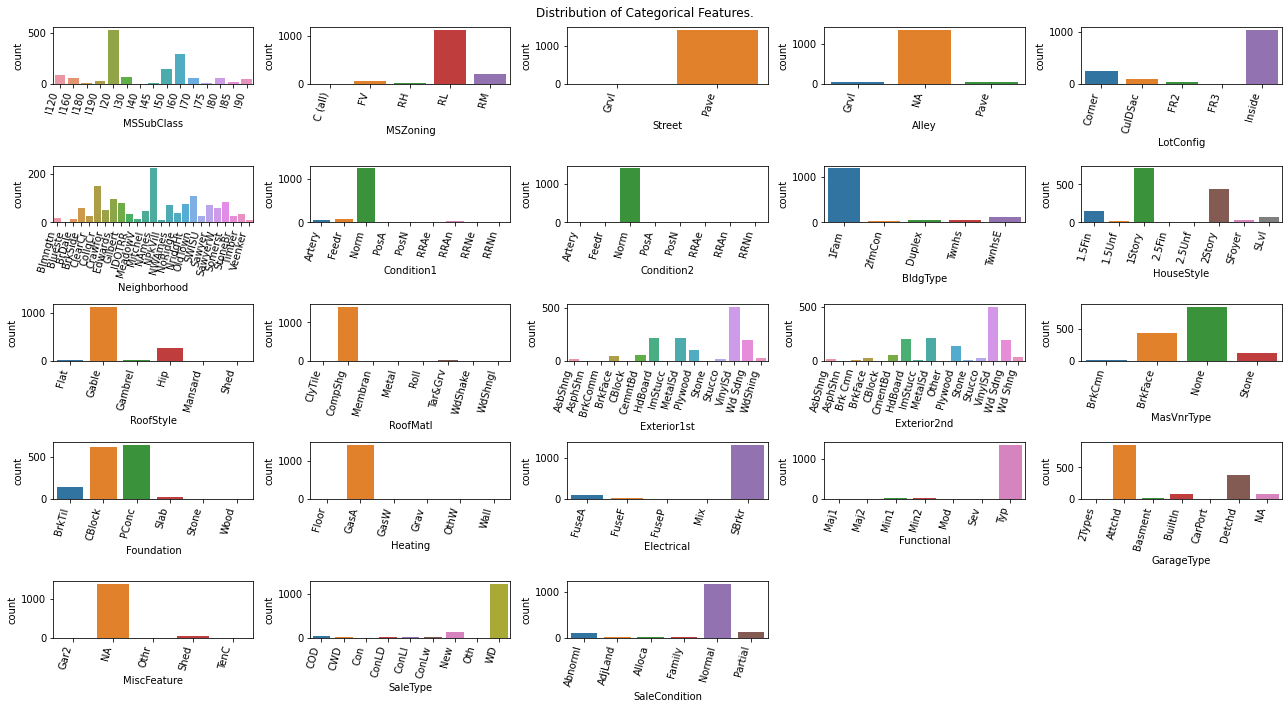

In [55]:
plot_count(df[nom_cols])

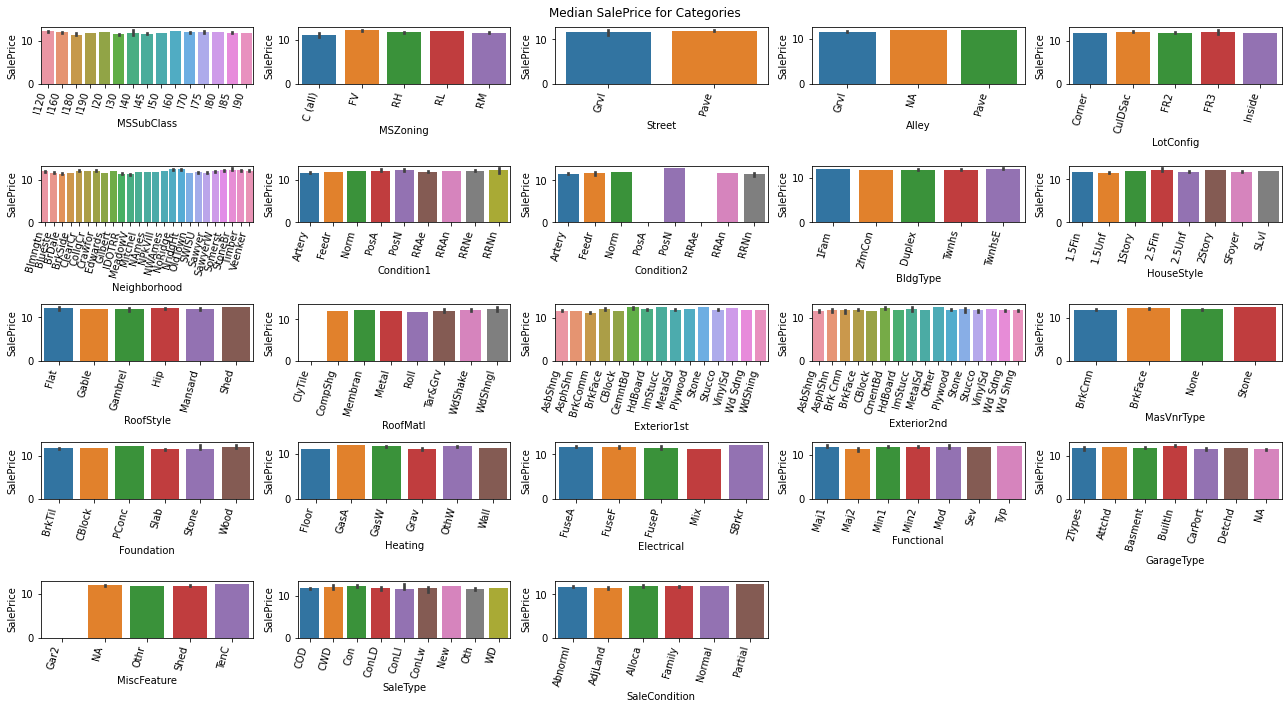

In [56]:
plot_bar(df, nom_cols, 'SalePrice')

In [57]:
combine_value_counts(df[nom_cols])

MSSubClass     MSZoning       Street      Alley      LotConfig  \
0   I20 : 526    RL : 1130  Pave : 1427  NA : 1343  Inside : 1035   
1   I60 : 292     RM : 213     Grvl : 4  Grvl : 49   Corner : 255   
2   I50 : 142      FV : 64            -  Pave : 39   CulDSac : 90   
3   I120 : 87      RH : 16            -          -       FR2 : 47   
4    I30 : 67  C (all) : 8            -          -        FR3 : 4   
5   I160 : 62            -            -          -              -   
6    I70 : 59            -            -          -              -   
7    I80 : 58            -            -          -              -   
8    I90 : 51            -            -          -              -   
9   I190 : 27            -            -          -              -   
10   I85 : 20            -            -          -              -   
11   I75 : 14            -            -          -              -   
12   I45 : 12            -            -          -              -   
13  I180 : 10            -            -          -              -   
14    I40 : 4            -            -          -              -   
15          -            -            -          -              -   
16          -            -            -          -              -   
17          -            -            -          -              -   
18          -            -            -          -              -   
19          -            -            -          -              -   
20          -            -            -          -              -   
21          -            -            -          -              -   
22          -            -            -          -              -   
23          -            -            -          -              -   
24          -            -            -          -              -   

     Neighborhood   Condition1   Condition2      BldgType    HouseStyle  \
0     NAmes : 222  Norm : 1237  Norm : 1419   1Fam : 1196  1Story : 713   
1   CollgCr : 150   Feedr : 79    Feedr : 6  TwnhsE : 113  2Story : 434   
2   OldTown : 110  Artery : 46   Artery : 2   Duplex : 51  1.5Fin : 150   
3    Edwards : 97    RRAn : 26     RRNn : 2    Twnhs : 43     SLvl : 65   
4    Somerst : 85    PosN : 18     PosN : 1   2fmCon : 28   SFoyer : 37   
5    Gilbert : 79    RRAe : 11     RRAn : 1             -   1.5Unf : 14   
6    NridgHt : 76     PosA : 7     PosA : 0             -   2.5Unf : 10   
7     Sawyer : 73     RRNn : 5     RRAe : 0             -    2.5Fin : 8   
8     NWAmes : 73     RRNe : 2            -             -             -   
9    BrkSide : 58            -            -             -             -   
10   SawyerW : 58            -            -             -             -   
11   Crawfor : 51            -            -             -             -   
12   Mitchel : 48            -            -             -             -   
13   NoRidge : 37            -            -             -             -   
14    Timber : 35            -            -             -             -   
15    IDOTRR : 34            -            -             -             -   
16   StoneBr : 25            -            -             -             -   
17   ClearCr : 25            -            -             -             -   
18     SWISU : 25            -            -             -             -   
19   Blmngtn : 17            -            -             -             -   
20   MeadowV : 16            -            -             -             -   
21    BrDale : 16            -            -             -             -   
22   Veenker : 10            -            -             -             -   
23    NPkVill : 9            -            -             -             -   
24    Blueste : 2            -            -             -             -   

       RoofStyle        RoofMatl    Exterior1st    Exterior2nd     MasVnrType  \
0   Gable : 1126  CompShg : 1411  VinylSd : 512  VinylSd : 502     None : 853   
1      Hip : 275    Tar&Grv : 10  HdBoard : 219  MetalSd : 211  BrkFace : 440   
2      Flat : 

In [58]:
cols_to_remove = ['Street','Alley','Condition2','RoofMatl','Heating','MiscFeature','Electrical','Functional']
#df = df.drop(columns=cols_to_remove)
for col in cols_to_remove:
    nom_cols.remove(col)
ommitted_cols.extend(cols_to_remove)

In [59]:
cat_cols = nom_cols + ord_cols
print('category features :',cat_cols, len(cat_cols))
print('numerical features :',inter_cols, len(inter_cols))
print(df[cat_cols+inter_cols].shape)


category features : ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'SaleType', 'SaleCondition', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'BedroomAbvGr', 'OverallQual', 'OverallCond', 'ExterQual', 'HeatingQC', 'KitchenQual', 'BsmtQual', 'FireplaceQu', 'BsmtFinType1', 'LotShape', 'BsmtExposure', 'GarageFinish'] 35
numerical features : ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice'] 18
(1431, 53)


------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - Some of the features have only one value/ Very less variance. 'Street','Alley','Condition2','RoofMatl','Heating','MiscFeature','Electrical', and'Functional' are removed.<br>
 - The trend of price with nominal featuresisnot very evidentfrom the plots.<br>
 - We are left with 53 features.<br>
</font>

-------------------------------------------------------------------------------------

### 6.6 Elimination of Highly correlated Features

We use cramers V for identifying correlation of nominal features.

In [60]:
def cramers_v(df):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
        returns corr as dataframe
    """
    l = len(df.columns)
    #corr_matrix = np.empty((l, l),dtype=float)
    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
    for i, col1 in  enumerate(df.columns):
        for j, col2 in enumerate(df.columns):
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            confusion_matrix = confusion_matrix.values
            chi2 = ss.chi2_contingency(confusion_matrix)[0]
            n = confusion_matrix.sum()
            phi2 = chi2 / n
            r, k = confusion_matrix.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            #corr_matrix[i, j] =  np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
            corr_matrix.loc[col1,col2] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return corr_matrix

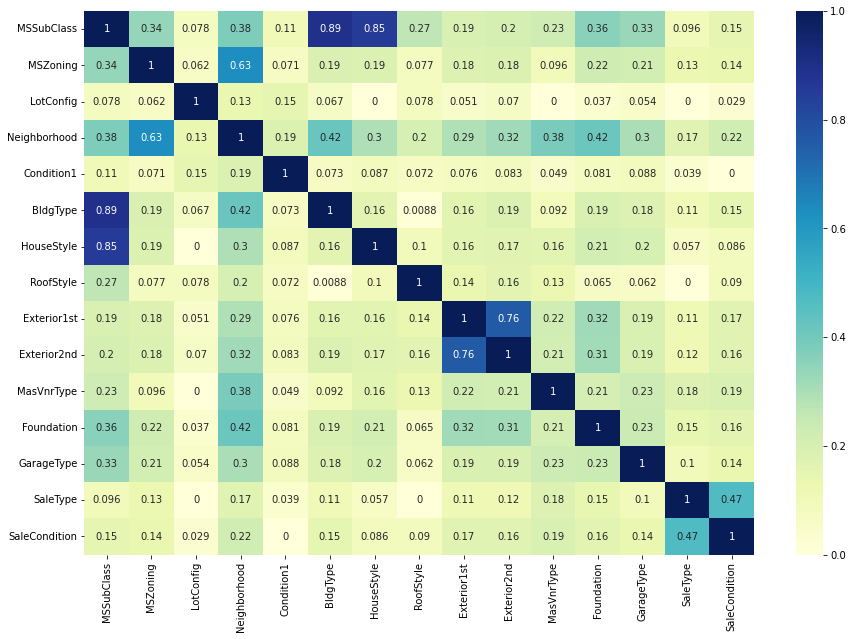

In [61]:
corr = cramers_v(df[nom_cols])
plt.figure(figsize=(15,10))
# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [62]:
#Drop the correlated columns
cols_to_remove = ['BldgType','HouseStyle','Exterior2nd']
#df = df.drop(columns=cols_to_remove)
for col in cols_to_remove:
    nom_cols.remove(col)
ommitted_cols.extend(cols_to_remove)

In [63]:
df.shape

(1431, 80)

Now we will see the correlation of numeric columns

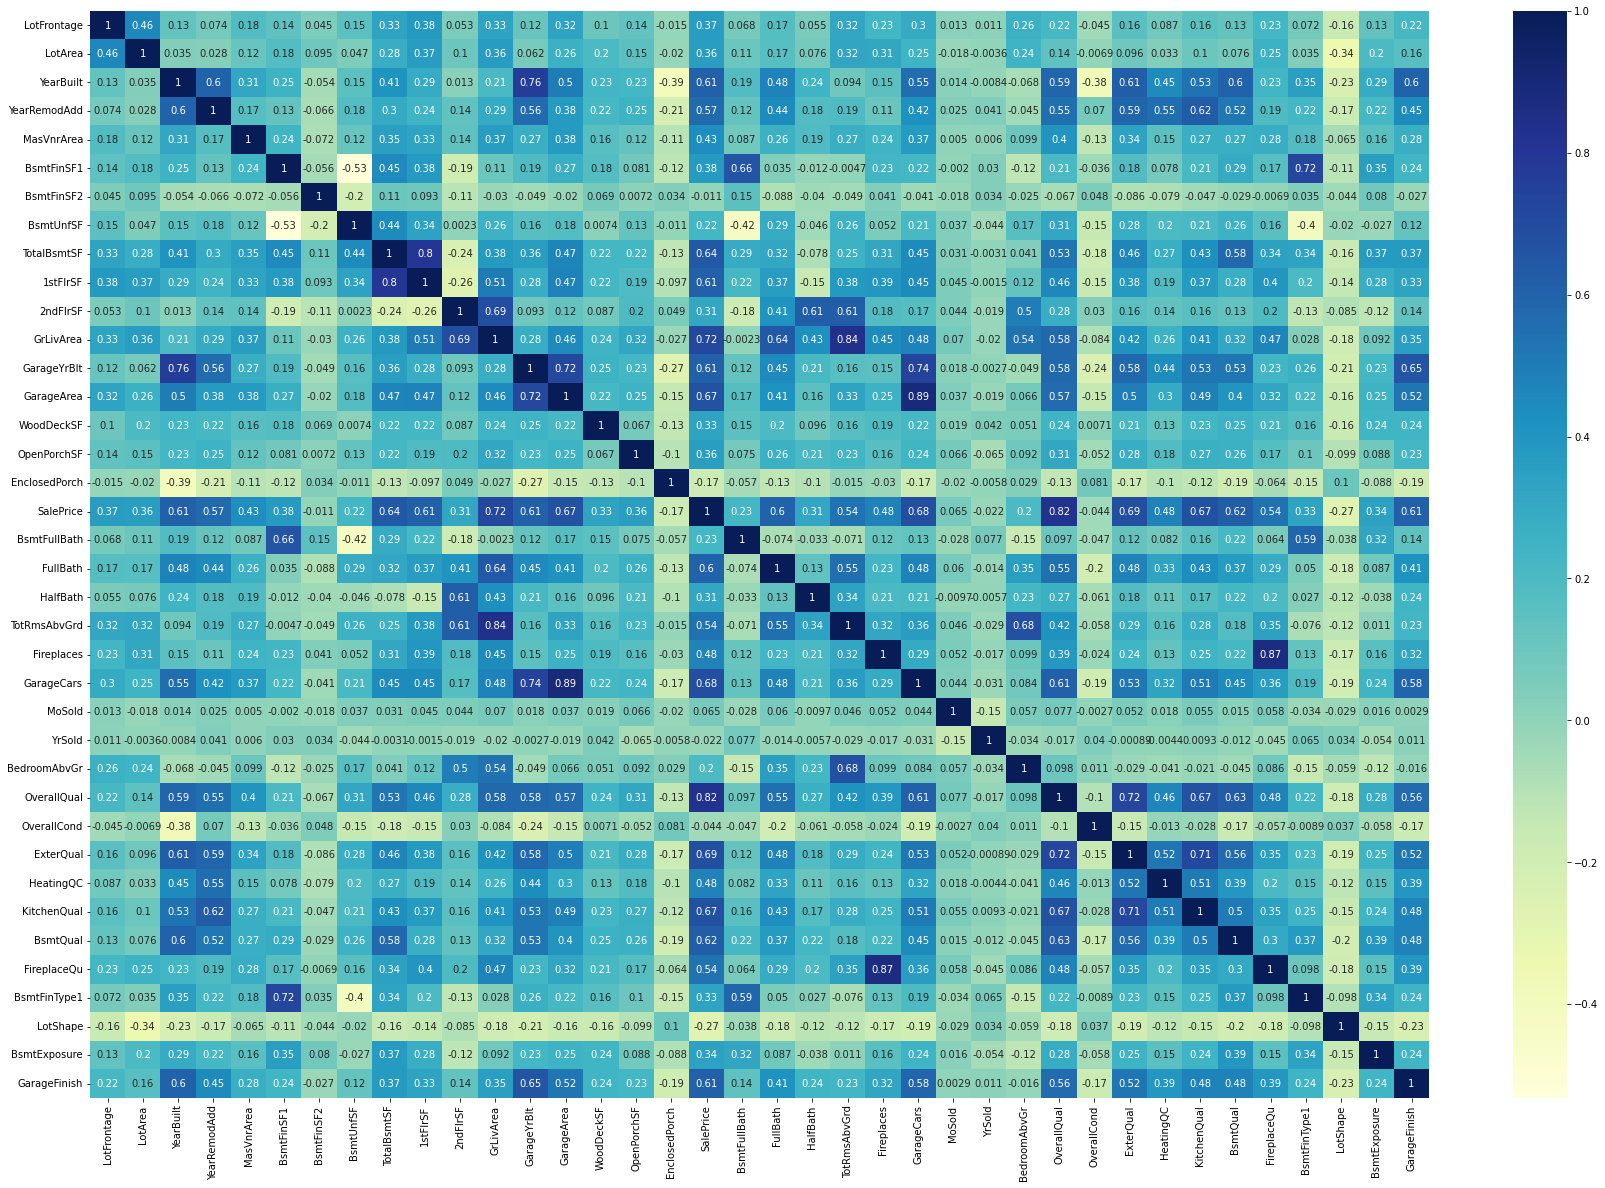

In [64]:
cor = df[inter_cols + ord_cols].corr()
plt.figure(figsize=(30,20))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

It is difficult to analyse the plot since the number of variables are high, we will filter the correlation for columns will correlation greater than 0.70

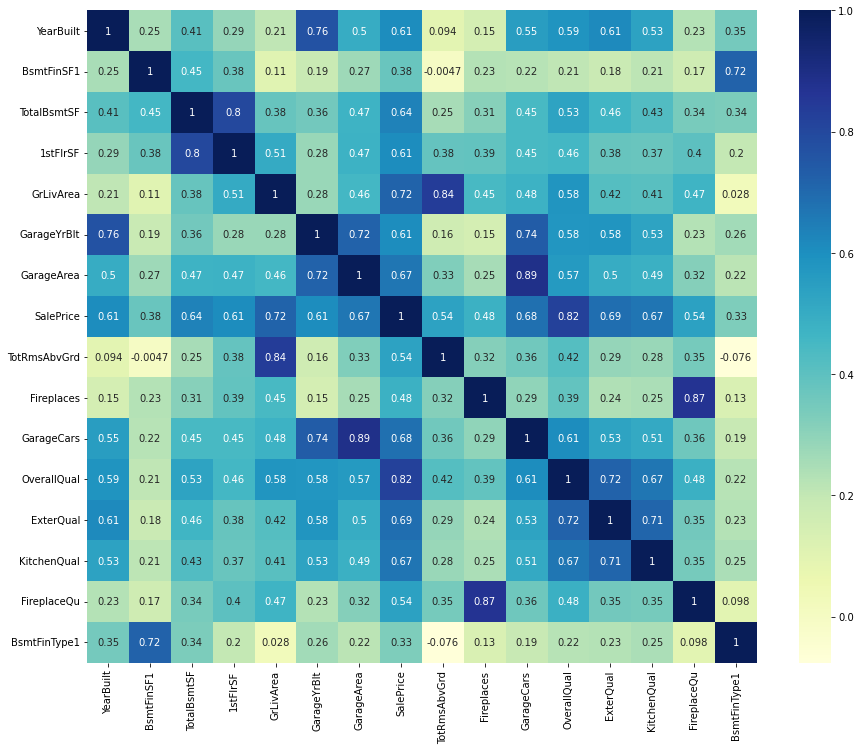

In [65]:
indx = cor.apply(lambda row:any([0.70<=r<1 or r<=-0.70 for r in row]))
# We will add Target variable to the group
indx = indx + (cor.columns == 'SalePrice')
cor2 = cor.loc[indx,indx]
plt.figure(figsize=(15,12))
sns.heatmap(cor2, cmap="YlGnBu", annot=True)
plt.show()

In [66]:
def get_columns_todrop(df, target='SalePrice', cuttoff=0.7):
    """Return highly correlated features. 
    
    Checks correlation between features and between feature and the target varible.
    Returns a list of features which has high correlation with other features and 
    lesser coorelation with the target variable.""" 
    dropcols = set()
    cols = df.columns[df.columns != target]
    
    for col in cols:
        indx = df.loc[cols, col].apply(lambda x: cuttoff<=x<1 or x<= -cuttoff) 
        cols2 = cols[indx]
        for col2 in cols2:
            if df.loc[col2, target] > df.loc[col, target] :
                dropcols.update([col])
            else:
                dropcols.update([col2])
    return dropcols

In [67]:
#We can add columns that are correlated and have less correlation with the target variable.
cols_to_remove = get_columns_todrop(cor2, target='SalePrice', cuttoff=0.7)
print(cols_to_remove)

{'GarageArea', 'YearBuilt', 'Fireplaces', '1stFlrSF', 'BsmtFinType1', 'KitchenQual', 'GarageYrBlt', 'TotRmsAbvGrd', 'ExterQual'}


In [68]:
#df = df.drop(columns=cols_to_remove)
for col in cols_to_remove:
    if col in inter_cols:
        inter_cols.remove(col)
    else:
        ord_cols.remove(col)
ommitted_cols.extend(cols_to_remove)

In [69]:
df.shape

(1431, 80)

We will use pair plot to visualise the coorelation

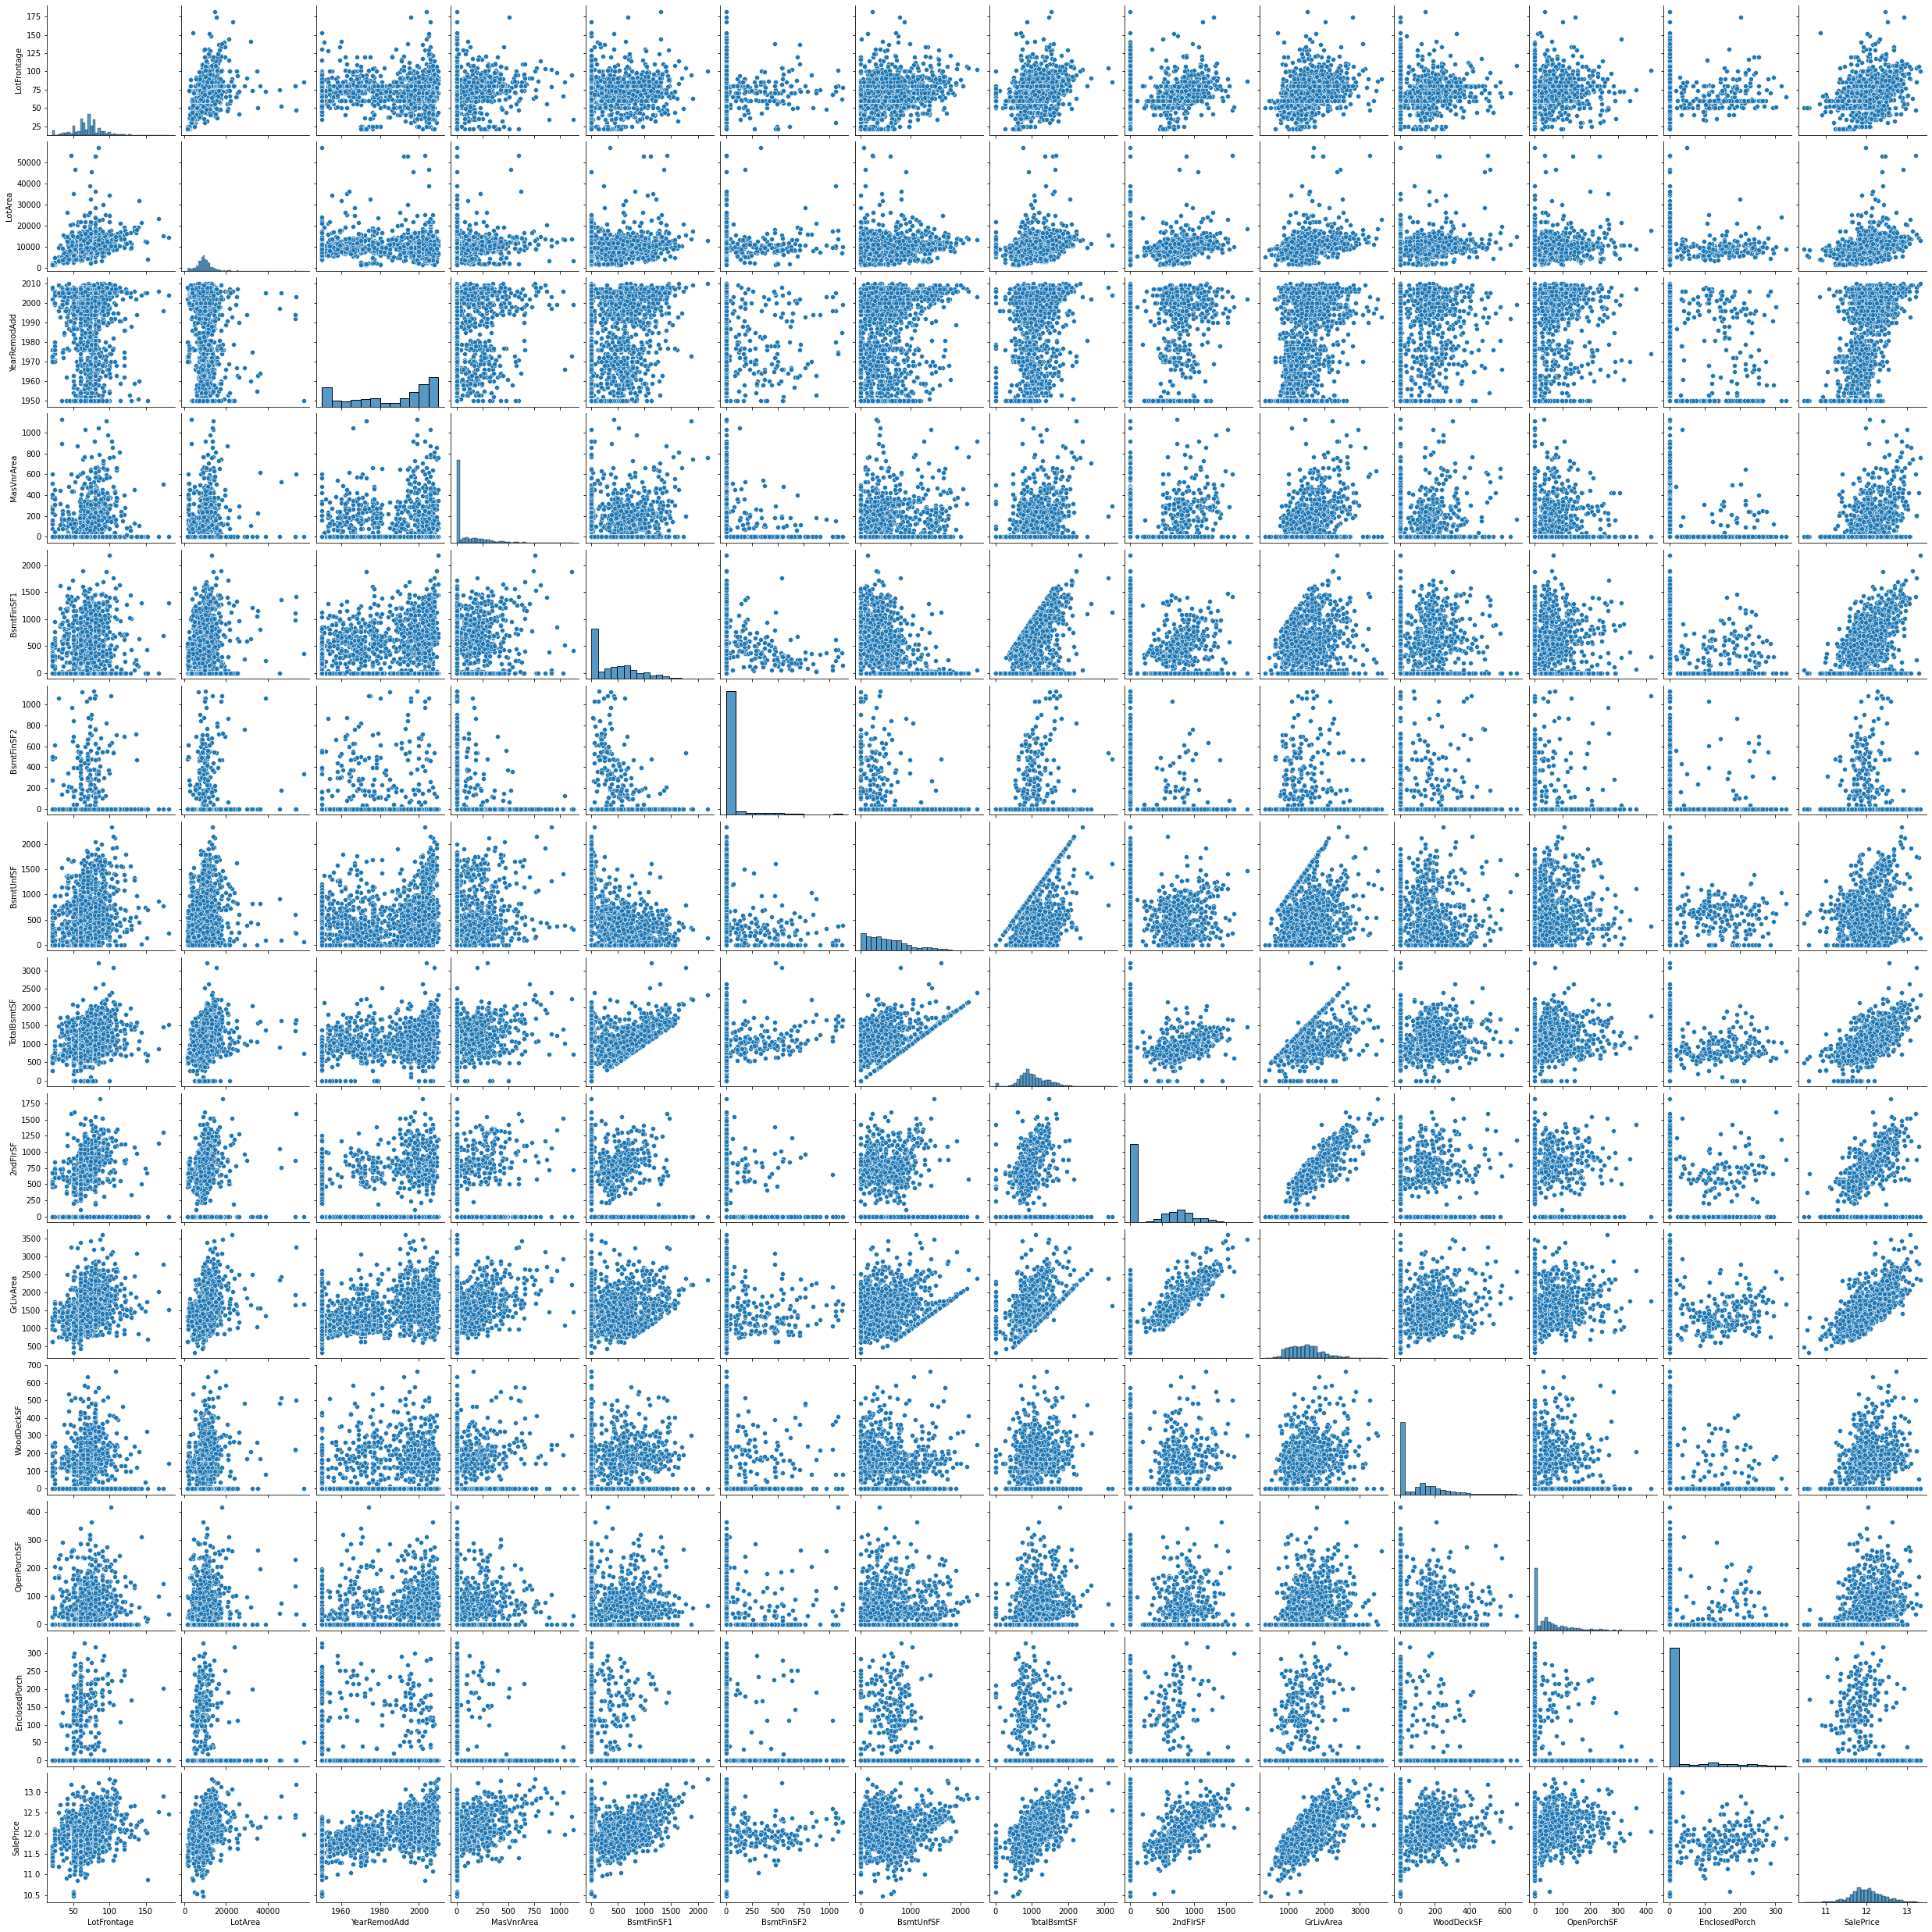

In [70]:
sns.pairplot(df[inter_cols], size=2.5)

------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - Some of the highly correlated features are removed. Fireplaces', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'GarageYrBlt', 'KitchenQual', 'ExterQual', 'BsmtFinType1', 'GarageArea', 'BldgType','HouseStyle',and 'Exterior2nd' are removed.<br>
 - Cramers-V was used to find the relationship of nominal variables.<br>
 - standard correlation coefficient was used to find relationship of numeric variables.<br>
 - Variables with correlation of more than .7 with each other are removed.<br>
</font>

-------------------------------------------------------------------------------------

## 7 Data Preparation

### 7.1 Dummy variables for Nominal Columns

Creating Dummy columns to convert nominal categorical into numerical

In [71]:
ord_cols

['BsmtFullBath',
 'FullBath',
 'HalfBath',
 'GarageCars',
 'MoSold',
 'YrSold',
 'BedroomAbvGr',
 'OverallQual',
 'OverallCond',
 'HeatingQC',
 'BsmtQual',
 'FireplaceQu',
 'LotShape',
 'BsmtExposure',
 'GarageFinish']

In [72]:
combine_value_counts(df[nom_cols])

MSSubClass     MSZoning      LotConfig   Neighborhood   Condition1  \
0   I20 : 526    RL : 1130  Inside : 1035    NAmes : 222  Norm : 1237   
1   I60 : 292     RM : 213   Corner : 255  CollgCr : 150   Feedr : 79   
2   I50 : 142      FV : 64   CulDSac : 90  OldTown : 110  Artery : 46   
3   I120 : 87      RH : 16       FR2 : 47   Edwards : 97    RRAn : 26   
4    I30 : 67  C (all) : 8        FR3 : 4   Somerst : 85    PosN : 18   
5   I160 : 62            -              -   Gilbert : 79    RRAe : 11   
6    I70 : 59            -              -   NridgHt : 76     PosA : 7   
7    I80 : 58            -              -    Sawyer : 73     RRNn : 5   
8    I90 : 51            -              -    NWAmes : 73     RRNe : 2   
9   I190 : 27            -              -   BrkSide : 58            -   
10   I85 : 20            -              -   SawyerW : 58            -   
11   I75 : 14            -              -   Crawfor : 51            -   
12   I45 : 12            -              -   Mitchel : 48            -   
13  I180 : 10            -              -   NoRidge : 37            -   
14    I40 : 4            -              -    Timber : 35            -   
15          -            -              -    IDOTRR : 34            -   
16          -            -              -   StoneBr : 25            -   
17          -            -              -   ClearCr : 25            -   
18          -            -              -     SWISU : 25            -   
19          -            -              -   Blmngtn : 17            -   
20          -            -              -   MeadowV : 16            -   
21          -            -              -    BrDale : 16            -   
22          -            -              -   Veenker : 10            -   
23          -            -              -    NPkVill : 9            -   
24          -            -              -    Blueste : 2            -   

       RoofStyle    Exterior1st     MasVnrType    Foundation    GarageType  \
0   Gable : 1126  VinylSd : 512     None : 853   PConc : 638  Attchd : 852   
1      Hip : 275  HdBoard : 219  BrkFace : 440  CBlock : 618  Detchd : 381   
2      Flat : 12  MetalSd : 217    Stone : 124  BrkTil : 144  BuiltIn : 86   
3   Gambrel : 11  Wd Sdng : 201    BrkCmn : 14     Slab : 23       NA : 79   
4    Mansard : 6  Plywood : 103              -     Stone : 5  Basment : 19   
5       Shed : 1   CemntBd : 59              -      Wood : 3   CarPort : 9   
6              -   BrkFace : 47              -             -    2Types : 5   
7              -   WdShing : 25              -             -             -   
8              -    Stucco : 22              -             -             -   
9              -   AsbShng : 20              -             -             -   
10             -    BrkComm : 2              -             -             -   
11             -    AsphShn : 1              -             -             -   
12             -     CBlock : 1              -             -             -   
13             -    ImStucc : 1              -             -             -   
14             -      Stone : 1              -             -             -   
15             -              -              -             -             -   
16             -              -              -             -             -   
17             -              -              -             -             -   
18             -              -              -             -             -   
19             -              -              -             -             -   
20             -              -              -             -             -   
21             -              -              -             -             -   
22             -              -              -             -             -   
23             -              -              -             -             -   
24             -              -              -             -             -   

     SaleType  SaleCondition  
0   WD : 1243  Normal : 1176  
1   New : 119

In [73]:
df = pd.get_dummies(df, columns=nom_cols, drop_first=True)

In [74]:
df.head()

LotFrontage  LotArea Street Alley  LotShape  LandContour  Utilities  \
Id                                                                        
1          65.0     8450   Pave    NA         3            3          3   
2          80.0     9600   Pave    NA         3            3          3   
3          68.0    11250   Pave    NA         2            3          3   
4          60.0     9550   Pave    NA         2            3          3   
5          84.0    14260   Pave    NA         2            3          3   

    LandSlope Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
Id                                                                       
1           2       Norm     1Fam     2Story            6            4   
2           2       Norm     1Fam     1Story            5            7   
3           2       Norm     1Fam     2Story            6            4   
4           2       Norm     1Fam     2Story            6            4   
5           2       Norm     1Fam     2Story            7            4   

    YearBuilt  YearRemodAdd RoofMatl Exterior2nd  MasVnrArea  ExterQual  \
Id                                                                        
1        2003          2003  CompShg     VinylSd       196.0          3   
2        1976          1976  CompShg     MetalSd         0.0          2   
3        2001          2002  CompShg     VinylSd       162.0          3   
4        1915          1970  CompShg     Wd Shng         0.0          2   
5        2000          2000  CompShg     VinylSd       350.0          3   

    ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
Id                                                                          
1           2         4         3             1             6         706   
2           2         4         3             4             5         978   
3           2         4         3             2             6         486   
4           2         3         4             1             5         216   
5           2         4         3             3             6         655   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
Id                                                                        
1              1           0        150          856    GasA          4   
2              1           0        284         1262    GasA          4   
3              1           0        434          920    GasA          4   
4              1           0        540          756    GasA          3   
5              1           0        490         1145    GasA          4   

    CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
Id                                                                       
1            0      SBrkr       856       854             0       1710   
2            0      SBrkr      1262         0             0       1262   
3            0      SBrkr       920       866             0       1786   
4            0      SBrkr       961       756             0       1717   
5            0      SBrkr      1145      1053             0       2198   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                 
1              1             0         2         1             3   
2              0             1         2         0             3   
3              1             0         2         1             3   
4              1             0         1         0             3   
5              1             0         2         1             4   

    KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
Id                                                                   
1              1            3             6        Typ           0   
2              1            2             4        Typ           1   
3              1            3             4        Typ           1   
4              1     

### 7.2 Split to test and train set

Split to test and train set

In [75]:
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=44)

### 7.2 Scaling the Features

In [76]:
#Scale the variables
scaler = MinMaxScaler()
df_train[ord_cols + inter_cols] = scaler.fit_transform(df_train[ord_cols + inter_cols])
df_test[ord_cols + inter_cols] = scaler.transform(df_test[ord_cols + inter_cols])

### 7.3 Split to X & y Variables

Split to dependend and Independent variables

In [77]:
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']
inter_cols.remove('SalePrice')
cols = [col for col in df.columns if col not in ['SalePrice']+ommitted_cols]
X_train = df_train[cols]
X_test = df_test[cols]

In [78]:
print(len(ommitted_cols))

39


In [79]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 653 to 772
Columns: 128 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(28), uint8(100)
memory usage: 370.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 755 to 1346
Columns: 128 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(28), uint8(100)
memory usage: 93.1 KB


------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - 39 columns were removed for further analysis.<br>
 - 128 columns are available for regression. <br>
 - Data is split into train_test and X, y.<br>
</font>

-------------------------------------------------------------------------------------

## 8 Model Building

### 8.1 Inital Model Building and RFE

We create a linear model and remove some features using RFE.

In [80]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=40)         
rfe = rfe.fit(X_train, y_train)

In [81]:
sorted(zip(X_train.columns,rfe.support_,rfe.ranking_), key=lambda x: x[2])

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('MSSubClass_I190', True, 1),
 ('MSSubClass_I30', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neighborhood_StoneBr', True, 1),
 ('Condition1_RRAe', True, 1),
 ('RoofStyle_Gambrel', True, 1),
 ('RoofStyle_Shed', True, 1),
 ('Exterior1st_BrkComm', True, 1),
 ('Exterior1st_CBlock', True, 1),
 ('Exterior1st_Stone', True, 1),
 ('Foundation_Slab', True, 1),
 ('Foundation_Wood', True, 1),
 ('SaleType_Con', True, 1),
 ('SaleType_ConLD', True, 

We use this selected feature data as input for next model.

In [82]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [83]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)
y_train_pred = lm.predict(X_train_rfe)
y_test_pred = lm.predict(X_test[col])
print(f'r2score of train : {r2_score(y_true=y_train, y_pred=y_train_pred):0.3f}')
print(f'r2score of test  : {r2_score(y_true=y_test, y_pred=y_test_pred):0.3f}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):0.3f}\n')

r2score of train : 0.915
r2score of test  : 0.898
RMSE : 0.041



### 8.2 StatsModel 

We have got a pretty good r2 score for test set. However the model is complex with large number of features. Lets reduce the complexity by Manual Feature Elimination using VIF and P value.

In [84]:
#Function to create a table with both VIF and P-values for easy coomparison of features
def evaluate_model(X, lr_model):
    vif = pd.DataFrame(index=lr_model.params.index)
    vif['VIF'] = [round(variance_inflation_factor(X.values, i),3) for i in range(X.shape[1])]

    vif['Coefficient'] = round(lr_model.params,3)
    vif['P-Values'] = round(lr_model.pvalues, 3)
    vif = vif.sort_values(by = ["VIF",'P-Values','Coefficient'],ascending = [False,False,True])
    print(f'R-Squared : {lr_model.rsquared:0.3f}    Adjusted R-Squared :{lr_model.rsquared_adj:0.3f} ')
    print( vif)

In [85]:
X_train_sm = X_train_rfe
X_train_sm = sm.add_constant(X_train_sm)
lm1 = sm.OLS(y_train, X_train_sm).fit() 
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     297.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:40:55   Log-Likelihood:                 2053.1
No. Observations:                1144   AIC:                            -4024.
Df Residuals:                    1103   BIC:                            -3817.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

In [86]:
evaluate_model(X_train_sm, lm1)

R-Squared : 0.915    Adjusted R-Squared :0.912 
                           VIF  Coefficient  P-Values
const                  204.379       -0.139     0.000
MSZoning_RL             26.817        0.129     0.000
MSZoning_RM             21.586        0.097     0.000
BsmtUnfSF               10.508       -0.008     0.709
BsmtFinSF1              10.051        0.065     0.001
TotalBsmtSF             10.003        0.150     0.000
MSZoning_FV              7.505        0.147     0.000
GrLivArea                3.398        0.226     0.000
OverallQual              3.339        0.222     0.000
BsmtQual                 3.234        0.066     0.000
FullBath                 2.468        0.040     0.000
MSZoning_RH              2.181        0.121     0.000
SaleType_New             2.154        0.054     0.000
BsmtFullBath             2.022        0.022     0.031
GarageCars               1.977        0.104     0.000
SaleCondition_Normal     1.936        0.027     0.000
HalfBath                 1.850    

In [87]:
#We will remove 'BsmtUnfSF'
X_train_sm.drop('BsmtUnfSF',axis=1, inplace=True)                
lm1 = sm.OLS(y_train, X_train_sm).fit() 
evaluate_model(X_train_sm, lm1)

R-Squared : 0.915    Adjusted R-Squared :0.912 
                           VIF  Coefficient  P-Values
const                  204.311       -0.139     0.000
MSZoning_RL             26.801        0.129     0.000
MSZoning_RM             21.577        0.097     0.000
MSZoning_FV              7.499        0.147     0.000
GrLivArea                3.396        0.226     0.000
OverallQual              3.322        0.221     0.000
BsmtQual                 3.231        0.066     0.000
TotalBsmtSF              2.855        0.141     0.000
FullBath                 2.466        0.039     0.000
BsmtFinSF1               2.225        0.072     0.000
MSZoning_RH              2.180        0.121     0.000
SaleType_New             2.147        0.054     0.000
GarageCars               1.976        0.104     0.000
SaleCondition_Normal     1.935        0.027     0.000
BsmtFullBath             1.913        0.023     0.021
HalfBath                 1.846        0.028     0.000
Foundation_Slab          1.779    

In [88]:
#We will remove 'MSZoning_RL                 '
X_train_sm.drop('MSZoning_RL',axis=1, inplace=True)                
lm1 = sm.OLS(y_train, X_train_sm).fit() 
evaluate_model(X_train_sm, lm1)

R-Squared : 0.910    Adjusted R-Squared :0.907 
                          VIF  Coefficient  P-Values
const                  84.783       -0.027     0.019
GrLivArea               3.370        0.215     0.000
OverallQual             3.283        0.235     0.000
BsmtQual                3.223        0.061     0.000
TotalBsmtSF             2.847        0.148     0.000
FullBath                2.446        0.048     0.000
BsmtFinSF1              2.225        0.071     0.000
SaleType_New            2.131        0.058     0.000
GarageCars              1.974        0.101     0.000
BsmtFullBath            1.908        0.027     0.007
SaleCondition_Normal    1.897        0.032     0.000
HalfBath                1.838        0.032     0.000
Foundation_Slab         1.776        0.055     0.000
LotArea                 1.574        0.105     0.000
LotFrontage             1.560        0.045     0.000
MSZoning_RM             1.435       -0.029     0.000
HeatingQC               1.411        0.053     0.00

In [89]:
#We will remove 'MSZoning_RH                 '
X_train_sm.drop('MSZoning_RH',axis=1, inplace=True)                
lm1 = sm.OLS(y_train, X_train_sm).fit() 
evaluate_model(X_train_sm, lm1)

R-Squared : 0.910    Adjusted R-Squared :0.907 
                          VIF  Coefficient  P-Values
const                  82.539       -0.027     0.016
GrLivArea               3.345        0.215     0.000
OverallQual             3.279        0.235     0.000
BsmtQual                3.221        0.061     0.000
TotalBsmtSF             2.847        0.148     0.000
FullBath                2.437        0.048     0.000
BsmtFinSF1              2.224        0.071     0.000
SaleType_New            2.116        0.058     0.000
GarageCars              1.973        0.101     0.000
BsmtFullBath            1.908        0.027     0.007
SaleCondition_Normal    1.866        0.032     0.000
HalfBath                1.830        0.032     0.000
Foundation_Slab         1.774        0.055     0.000
LotArea                 1.568        0.105     0.000
LotFrontage             1.556        0.045     0.000
MSZoning_RM             1.425       -0.029     0.000
HeatingQC               1.411        0.053     0.00

In [90]:
#We will remove 'SaleCondition_AdjLand                 '
X_train_sm.drop('SaleCondition_AdjLand',axis=1, inplace=True)                
lm1 = sm.OLS(y_train, X_train_sm).fit() 
evaluate_model(X_train_sm, lm1)

R-Squared : 0.910    Adjusted R-Squared :0.907 
                         VIF  Coefficient  P-Values
const                 80.205       -0.024     0.030
GrLivArea              3.337        0.213     0.000
OverallQual            3.259        0.236     0.000
BsmtQual               3.207        0.060     0.000
TotalBsmtSF            2.835        0.147     0.000
FullBath               2.423        0.049     0.000
BsmtFinSF1             2.215        0.071     0.000
SaleType_New           2.104        0.058     0.000
GarageCars             1.946        0.099     0.000
BsmtFullBath           1.905        0.026     0.009
HalfBath               1.829        0.032     0.000
SaleCondition_Normal   1.826        0.031     0.000
Foundation_Slab        1.766        0.054     0.000
LotArea                1.568        0.105     0.000
LotFrontage            1.556        0.045     0.000
MSZoning_RM            1.422       -0.029     0.000
HeatingQC              1.409        0.053     0.000
Neighborhood_Nri

In [91]:
#We will remove 'RoofStyle_Shed                          '
X_train_sm.drop('RoofStyle_Shed',axis=1, inplace=True)                
lm1 = sm.OLS(y_train, X_train_sm).fit() 
evaluate_model(X_train_sm, lm1)

R-Squared : 0.909    Adjusted R-Squared :0.907 
                         VIF  Coefficient  P-Values
const                 80.180       -0.025     0.028
GrLivArea              3.336        0.214     0.000
OverallQual            3.250        0.237     0.000
BsmtQual               3.206        0.060     0.000
TotalBsmtSF            2.835        0.147     0.000
FullBath               2.398        0.048     0.000
BsmtFinSF1             2.214        0.071     0.000
SaleType_New           2.104        0.058     0.000
GarageCars             1.945        0.099     0.000
BsmtFullBath           1.898        0.027     0.007
HalfBath               1.828        0.032     0.000
SaleCondition_Normal   1.826        0.031     0.000
Foundation_Slab        1.764        0.055     0.000
LotArea                1.556        0.107     0.000
LotFrontage            1.555        0.045     0.000
MSZoning_RM            1.422       -0.029     0.000
HeatingQC              1.407        0.052     0.000
Neighborhood_Nri

In [92]:
#We will remove 'Exterior1st_Stone                 '
X_train_sm.drop('Exterior1st_Stone',axis=1, inplace=True)                
lm1 = sm.OLS(y_train, X_train_sm).fit() 
evaluate_model(X_train_sm, lm1)

R-Squared : 0.909    Adjusted R-Squared :0.906 
                         VIF  Coefficient  P-Values
const                 80.147       -0.024     0.031
GrLivArea              3.334        0.214     0.000
OverallQual            3.250        0.237     0.000
BsmtQual               3.206        0.060     0.000
TotalBsmtSF            2.835        0.146     0.000
FullBath               2.392        0.047     0.000
BsmtFinSF1             2.214        0.071     0.000
SaleType_New           2.096        0.057     0.000
GarageCars             1.944        0.100     0.000
BsmtFullBath           1.897        0.027     0.008
HalfBath               1.826        0.032     0.000
SaleCondition_Normal   1.812        0.030     0.000
Foundation_Slab        1.764        0.054     0.000
LotArea                1.556        0.107     0.000
LotFrontage            1.554        0.045     0.000
MSZoning_RM            1.422       -0.029     0.000
HeatingQC              1.404        0.053     0.000
Neighborhood_Nri

In [93]:
#We will remove 'Exterior1st_CBlock                          '
X_train_sm.drop('Exterior1st_CBlock',axis=1, inplace=True)                
lm1 = sm.OLS(y_train, X_train_sm).fit() 
evaluate_model(X_train_sm, lm1)

R-Squared : 0.909    Adjusted R-Squared :0.906 
                         VIF  Coefficient  P-Values
const                 80.135       -0.024     0.030
GrLivArea              3.325        0.213     0.000
OverallQual            3.239        0.238     0.000
BsmtQual               3.204        0.060     0.000
TotalBsmtSF            2.834        0.147     0.000
FullBath               2.388        0.047     0.000
BsmtFinSF1             2.213        0.071     0.000
SaleType_New           2.096        0.057     0.000
GarageCars             1.943        0.100     0.000
BsmtFullBath           1.894        0.027     0.007
HalfBath               1.824        0.032     0.000
SaleCondition_Normal   1.812        0.030     0.000
Foundation_Slab        1.764        0.055     0.000
LotArea                1.552        0.108     0.000
LotFrontage            1.551        0.044     0.000
MSZoning_RM            1.421       -0.029     0.000
HeatingQC              1.400        0.052     0.000
Neighborhood_Nri

In [94]:
#We will remove 'SaleType_ConLI                          '
X_train_sm.drop('SaleType_ConLI',axis=1, inplace=True)                
lm1 = sm.OLS(y_train, X_train_sm).fit() 
evaluate_model(X_train_sm, lm1)

R-Squared : 0.909    Adjusted R-Squared :0.906 
                         VIF  Coefficient  P-Values
const                 80.135       -0.024     0.030
GrLivArea              3.322        0.213     0.000
OverallQual            3.238        0.238     0.000
BsmtQual               3.204        0.060     0.000
TotalBsmtSF            2.834        0.147     0.000
FullBath               2.388        0.047     0.000
BsmtFinSF1             2.213        0.071     0.000
SaleType_New           2.091        0.057     0.000
GarageCars             1.943        0.100     0.000
BsmtFullBath           1.894        0.027     0.006
HalfBath               1.824        0.032     0.000
SaleCondition_Normal   1.810        0.030     0.000
Foundation_Slab        1.764        0.055     0.000
LotArea                1.552        0.109     0.000
LotFrontage            1.551        0.044     0.000
MSZoning_RM            1.421       -0.029     0.000
HeatingQC              1.400        0.053     0.000
Neighborhood_Nri

In [95]:
#We will remove 'SaleType_ConLD                          '
X_train_sm.drop('SaleType_ConLD',axis=1, inplace=True)                
lm1 = sm.OLS(y_train, X_train_sm).fit() 
evaluate_model(X_train_sm, lm1)

R-Squared : 0.909    Adjusted R-Squared :0.906 
                         VIF  Coefficient  P-Values
const                 79.894       -0.023     0.037
GrLivArea              3.322        0.213     0.000
OverallQual            3.229        0.240     0.000
BsmtQual               3.204        0.060     0.000
TotalBsmtSF            2.833        0.146     0.000
FullBath               2.387        0.047     0.000
BsmtFinSF1             2.213        0.071     0.000
SaleType_New           2.084        0.057     0.000
GarageCars             1.940        0.099     0.000
BsmtFullBath           1.894        0.027     0.007
HalfBath               1.821        0.032     0.000
SaleCondition_Normal   1.801        0.030     0.000
Foundation_Slab        1.757        0.056     0.000
LotArea                1.551        0.109     0.000
LotFrontage            1.548        0.045     0.000
MSZoning_RM            1.421       -0.029     0.000
HeatingQC              1.400        0.053     0.000
Neighborhood_Nri

In [96]:
#We will remove 'SaleType_Con                          '
X_train_sm.drop('SaleType_Con',axis=1, inplace=True)                
lm1 = sm.OLS(y_train, X_train_sm).fit() 
evaluate_model(X_train_sm, lm1)

R-Squared : 0.908    Adjusted R-Squared :0.906 
                         VIF  Coefficient  P-Values
const                 79.892       -0.023     0.037
GrLivArea              3.321        0.213     0.000
OverallQual            3.224        0.241     0.000
BsmtQual               3.203        0.059     0.000
TotalBsmtSF            2.831        0.147     0.000
FullBath               2.385        0.046     0.000
BsmtFinSF1             2.213        0.071     0.000
SaleType_New           2.083        0.057     0.000
GarageCars             1.940        0.099     0.000
BsmtFullBath           1.892        0.028     0.006
HalfBath               1.818        0.032     0.000
SaleCondition_Normal   1.801        0.030     0.000
Foundation_Slab        1.757        0.056     0.000
LotArea                1.550        0.109     0.000
LotFrontage            1.545        0.044     0.000
MSZoning_RM            1.421       -0.029     0.000
HeatingQC              1.399        0.053     0.000
Neighborhood_Nri

In [97]:
X_train_sm.shape

(1144, 31)

In [98]:
X_train_sm.drop('const',axis=1, inplace=True)
X_test_sm = X_test[X_train_sm.columns]

------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - The features were reduced to 40 from 128 through RFE.<br>
 - The features were further eliminated to 30 through p-value and VIF.<br>
 - The present model is giving good results of r2 0.908.<br>
</font>

-------------------------------------------------------------------------------------

### 8.2 Ridge Regression Model

We build a ridge regression model to reduce the variance.

In [99]:
#Helper function for plotting Results
def plot_MAE(model):
    cv_results = pd.DataFrame(model.cv_results_)
    bestalpha = model.best_params_['alpha']
    bestscore = model.best_score_
    ind = cv_results['param_alpha']<= bestalpha*3
    fig, axs = plt.subplots(1,2, figsize=(14,6))
    axs = axs.flatten()
    ax = axs[0]
    ax.plot(cv_results['param_alpha'][ind], cv_results['mean_train_score'][ind])
    ax.plot(cv_results['param_alpha'][ind], cv_results['mean_test_score'][ind])
    ax.axvline(bestalpha,linestyle='--', color='black', linewidth=1)
    ax.axhline(bestscore,linestyle='--', color='black', linewidth=1)
    ax.set_xlabel('alpha')
    ax.set_ylabel('Negative Mean Absolute Error')
    ax.set_title("Variation of MAE with Alpha ")
    ax.legend(['train score', 'test score'])
    ax.grid('minor')
    ax = axs[1]
    ax.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    ax.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    ax.axvline(bestalpha,linestyle='--', color='black', linewidth=1)
    ax.axhline(bestscore,linestyle='--', color='black', linewidth=1)
    ax.set_xlabel('alpha (log scale)')
    ax.set_xscale('log')
    ax.set_ylabel('Negative Mean Absolute Error')
    ax.set_title("Variation of MAE with Alpha ")
    ax.legend(['train score', 'test score'])
    ax.grid('minor')

    plt.show()
    print(f'Best Model is with alpha={bestalpha}') 
    print(f'Best Score is {model.best_score_:0.4f}')

# Helper function for printing the equation of the model.
def print_equation(yname, features, coefficients, n=3, constant=None):
    indx = coefficients !=0
    yname = f'{yname} = '
    coefficients = coefficients[indx]
    features = features[indx]
    rowwidth = len(yname)
    maxwidth = len(max(features, key=len))+9
    indx = np.argsort(np.abs(coefficients))[::-1]
    coefficients, features = coefficients[indx], features[indx]
    signs = ['-' if np.sign(x)== -1 else '+' for x in coefficients]
    coefficients = np.abs(coefficients)
    #params = list(zip(map(lambda x: '-' if np.sign(x)== -1 else '+', coefficients),
    #                      np.abs(coefficients), features))
    #params = sorted(params, key=lambda x:x[1], reverse=True)
    l1 = len(features)
    indx=[*zip(range(0,l1+n,n), range(n,l1+n,n))]
    featlist = [''.join([sign +f'  {coeff:0.3f}*{feat} '.ljust(maxwidth) 
                for sign, coeff,feat in zip(signs[x:y], coefficients[x:y], features[x:y])])
                for x,y in indx]
    if constant:
        featlist.insert(0, yname + f'{constant:0.3f}')
    else:
        featlist[0] = yname + featlist[0][1:] 
    print('Number of Coefficients :' , len(features))
    print('The equation is : \n')
    print(('\n' +' '*rowwidth).join(featlist))
    return 

We will first find the optimum alpha by using grid search.

In [100]:
#Create a set of values for alpha.
alpha = np.array([x*np.linspace(1,9,9) for x in np.geomspace(0.0001,100,7)]).flatten()
alpha

array([1.e-04, 2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04,
       9.e-04, 1.e-03, 2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03,
       8.e-03, 9.e-03, 1.e-02, 2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02,
       7.e-02, 8.e-02, 9.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01, 5.e-01,
       6.e-01, 7.e-01, 8.e-01, 9.e-01, 1.e+00, 2.e+00, 3.e+00, 4.e+00,
       5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00, 1.e+01, 2.e+01, 3.e+01,
       4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01, 1.e+02, 2.e+02,
       3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02])

In [101]:
# Ridge in Grid Search 
params = {'alpha': alpha}
ridge = Ridge()
# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', 
                              cv = folds, return_train_score=True, verbose = 1)            
model_cv_ridge.fit(X_train_sm, y_train) 

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-04, 2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04,
       9.e-04, 1.e-03, 2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03,
       8.e-03, 9.e-03, 1.e-02, 2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02,
       7.e-02, 8.e-02, 9.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01, 5.e-01,
       6.e-01, 7.e-01, 8.e-01, 9.e-01, 1.e+00, 2.e+00, 3.e+00, 4.e+00,
       5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00, 1.e+01, 2.e+01, 3.e+01,
       4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01, 1.e+02, 2.e+02,
       3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

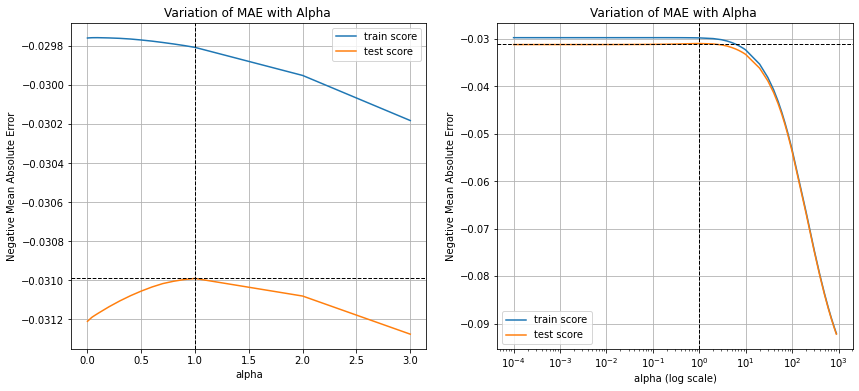

Best Model is with alpha=1.0
Best Score is -0.0310


In [102]:
# plotting mean test and train scoes with alpha 
plot_MAE(model_cv_ridge)

The best value of alpha is **1.0**. How ever we can take it as alpha=10 as the deviation is minimum. We will train a Ridge Regression for this value of alpha and our x_train_rfe.

In [103]:
alpha = 10#model_cv_ridge.best_params_['alpha']
lm_r = Ridge(alpha=alpha)
lm_r.fit(X_train_sm, y_train)
y_train_pred = lm_r.predict(X_train_sm)
y_test_pred = lm_r.predict(X_test_sm)
print(f'r2score of train : {r2_score(y_true=y_train, y_pred=y_train_pred):0.3f}')
print(f'r2score of test  : {r2_score(y_true=y_test, y_pred=y_test_pred):0.3f}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):0.3f}')
print_equation('log(SalePrice)', X_train_sm.columns, lm_r.coef_, 3, constant=lm_r.intercept_)

r2score of train : 0.895
r2score of test  : 0.895
RMSE : 0.042
Number of Coefficients : 30
The equation is : 

log(SalePrice) = 0.054
                 +  0.168*OverallQual          +  0.155*GrLivArea            +  0.106*GarageCars           
                 +  0.105*TotalBsmtSF          +  0.077*FullBath             +  0.075*OverallCond          
                 +  0.073*BsmtFinSF1           +  0.063*BsmtQual             +  0.061*HeatingQC            
                 +  0.059*LotArea              +  0.054*LotFrontage          +  0.053*SaleType_New         
                 +  0.045*Neighborhood_Crawfor +  0.041*HalfBath             -  0.039*MSSubClass_I30       
                 +  0.039*OpenPorchSF          +  0.039*WoodDeckSF           +  0.036*Neighborhood_NridgHt 
                 +  0.034*Neighborhood_StoneBr -  0.033*MSZoning_RM          +  0.026*BsmtFullBath         
                 -  0.026*MSSubClass_I190      +  0.025*SaleCondition_Normal -  0.020*Condition1_RRAe      
  

We will choose double the value of alpha and see the effect.

In [104]:
lm_r = Ridge(alpha=alpha*2)
lm_r.fit(X_train_sm, y_train)
y_train_pred = lm_r.predict(X_train_sm)
y_test_pred = lm_r.predict(X_test_sm)
print(f'r2score of train : {r2_score(y_true=y_train, y_pred=y_train_pred):0.3f}')
print(f'r2score of test  : {r2_score(y_true=y_test, y_pred=y_test_pred):0.3f}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):0.3f}\n')
print_equation('log(SalePrice)', X_train_sm.columns, lm_r.coef_, 3, constant=lm_r.intercept_)

r2score of train : 0.878
r2score of test  : 0.882
RMSE : 0.045

Number of Coefficients : 30
The equation is : 

log(SalePrice) = 0.100
                 +  0.140*OverallQual          +  0.131*GrLivArea            +  0.102*GarageCars           
                 +  0.088*TotalBsmtSF          +  0.080*FullBath             +  0.069*BsmtFinSF1           
                 +  0.065*BsmtQual             +  0.064*HeatingQC            +  0.054*OverallCond          
                 +  0.050*SaleType_New         +  0.050*LotFrontage          +  0.046*LotArea              
                 +  0.044*HalfBath             +  0.041*Neighborhood_Crawfor -  0.040*MSSubClass_I30       
                 +  0.040*WoodDeckSF           +  0.040*Neighborhood_NridgHt +  0.040*OpenPorchSF          
                 -  0.036*MSZoning_RM          +  0.031*Neighborhood_StoneBr +  0.026*BsmtFullBath         
                 +  0.021*SaleCondition_Normal -  0.020*MSSubClass_I190      -  0.014*Condition1_RRAe      
 

------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - The model was made with different alpha values using GridSearch and Ridge.<br>
 - The optimum alpha value is found to be <b> 1.0 </b>. from grid search.<br>
 - The  alpha value is set as <b> 10 </b>. to improve the regularisation further.<br>
 - The top 7 features are OverallQual, GrLivArea, TotalBsmtSF, OverallCond, GarageCars, LotArea, BsmtFinSF1 .<br>
 - The top 7 features did not change for double value of alpha(20).<br>
 - The r2 score and coefficents reduced for higher value of alpha.<br>
    
</font>

-------------------------------------------------------------------------------------

### 8.3 Lasso Regression Model

In [105]:
#Create a set of values for alpha.
alpha = np.array([x*np.linspace(1,9,9) for x in np.geomspace(0.00001,1,6)]).flatten()

In [106]:
# Applying Lasso
params = {'alpha': alpha}
lasso = Lasso()
# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', 
                              cv = folds, return_train_score=True, verbose = 1)            
model_cv_lasso.fit(X_train_sm, y_train) 

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05,
       9.e-05, 1.e-04, 2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04,
       8.e-04, 9.e-04, 1.e-03, 2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03,
       7.e-03, 8.e-03, 9.e-03, 1.e-02, 2.e-02, 3.e-02, 4.e-02, 5.e-02,
       6.e-02, 7.e-02, 8.e-02, 9.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01,
       5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01, 1.e+00, 2.e+00, 3.e+00,
       4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

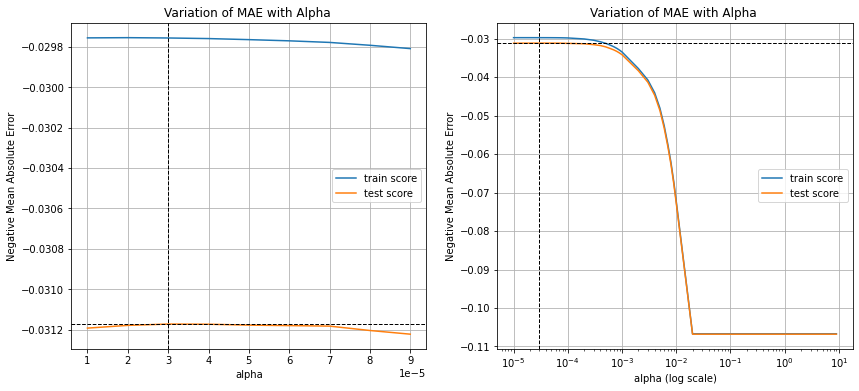

Best Model is with alpha=3.0000000000000004e-05
Best Score is -0.0312


In [107]:
# plotting mean test and train scoes with alpha 
plot_MAE(model_cv_lasso)

The best value of alpha is **0.00003*. We will train a Lasso Regression for this value of alpha and our X_train_rfe.

In [108]:
#build model
alpha = 0.00003
#model_cv_lasso.best_params_['alpha']
lm_l = Lasso(alpha=alpha)
lm_l.fit(X_train_sm, y_train)
# predict
y_train_pred = lm_l.predict(X_train_sm)
y_test_pred = lm_l.predict(X_test_sm)
print(f'r2score of train : {r2_score(y_true=y_train, y_pred=y_train_pred):0.3f}')
print(f'r2score of test  : {r2_score(y_true=y_test, y_pred=y_test_pred):0.3f}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):0.3f}\n')
print_equation('log(SalePrice)', X_train_sm.columns, lm_l.coef_, 3, constant=lm_l.intercept_)

r2score of train : 0.908
r2score of test  : 0.900
RMSE : 0.041

Number of Coefficients : 30
The equation is : 

log(SalePrice) = -0.019
                 +  0.242*OverallQual          +  0.214*GrLivArea            +  0.145*TotalBsmtSF          
                 +  0.115*OverallCond          +  0.105*LotArea              +  0.099*GarageCars           
                 +  0.072*BsmtFinSF1           -  0.071*Exterior1st_BrkComm  +  0.063*SaleType_Oth         
                 -  0.062*Foundation_Wood      +  0.057*BsmtQual             +  0.056*SaleType_New         
                 +  0.053*HeatingQC            +  0.051*Foundation_Slab      +  0.046*FullBath             
                 +  0.042*LotFrontage          +  0.041*Neighborhood_Crawfor -  0.037*Condition1_RRAe      
                 -  0.036*MSSubClass_I190      -  0.033*MSSubClass_I30       +  0.031*HalfBath             
                 -  0.031*RoofStyle_Gambrel    +  0.031*Neighborhood_StoneBr -  0.030*MSZoning_RM          


Since such low value of alpha does not affect the model , we will increase alpha to 0.002

In [109]:
alpha = 0.0015
#model_cv_lasso.best_params_['alpha']
lm_l = Lasso(alpha=alpha)
lm_l.fit(X_train_sm, y_train)
# predict
y_train_pred_final = lm_l.predict(X_train_sm)
y_test_pred_final = lm_l.predict(X_test_sm)
print(f'r2score of train : {r2_score(y_true=y_train, y_pred=y_train_pred_final):0.3f}')
print(f'r2score of test  : {r2_score(y_true=y_test, y_pred=y_test_pred_final):0.3f}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):0.3f}\n')
print_equation('log(SalePrice)', X_train_sm.columns, lm_l.coef_, 3, constant=lm_l.intercept_)

r2score of train : 0.866
r2score of test  : 0.886
RMSE : 0.041

Number of Coefficients : 15
The equation is : 

log(SalePrice) = 0.122
                 +  0.281*OverallQual          +  0.261*GrLivArea            +  0.113*GarageCars           
                 +  0.085*BsmtFinSF1           +  0.052*HeatingQC            +  0.049*TotalBsmtSF          
                 +  0.047*BsmtQual             -  0.047*MSZoning_RM          +  0.026*SaleType_New         
                 +  0.017*OverallCond          +  0.012*WoodDeckSF           -  0.006*MSSubClass_I30       
                 +  0.006*FullBath             +  0.004*Neighborhood_NridgHt +  0.004*SaleCondition_Normal 


In [110]:
#we will mark this model for referencing later
lm_final = lm_l
cols, coefs =X_train_sm.columns, lm_final.coef_
ind = coefs!=0
cols, coefs = cols[ind], coefs[ind]
ind = np.argsort(np.abs(coefs))[::-1]
cols_final, coefs_final = cols[ind], coefs[ind]

 We will choose double the value of alpha and see the effect.

In [111]:
lm_l2 = Lasso(alpha=alpha*2)
lm_l2.fit(X_train_sm, y_train)
# predict
y_train_pred = lm_l2.predict(X_train_sm)
y_test_pred = lm_l2.predict(X_test_sm)
print(f'r2score of train : {r2_score(y_true=y_train, y_pred=y_train_pred):0.3f}')
print(f'r2score of test  : {r2_score(y_true=y_test, y_pred=y_test_pred):0.3f}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):0.3f}\n')
print_equation('log(SalePrice)', X_train_sm.columns, lm_l2.coef_, 3, constant=lm_l2.intercept_)


r2score of train : 0.829
r2score of test  : 0.854
RMSE : 0.050

Number of Coefficients : 8
The equation is : 

log(SalePrice) = 0.176
                 +  0.284*OverallQual  +  0.224*GrLivArea    +  0.112*GarageCars   
                 +  0.069*BsmtFinSF1   -  0.047*MSZoning_RM  +  0.047*BsmtQual     
                 +  0.046*HeatingQC    +  0.014*SaleType_New 


------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - The model was made with different alpha values using GridSearch and Lasso.<br>
 - The optimum alpha value is found to be <b> 0.00003 </b>. from grid search.<br>
 - The  alpha value is set as <b> 0.0015 </b>. to improve the regularisation further.This value of  alpha is taken as our model alpha as it provides sufficient regularization and reduces the complexity by reducing  the number of features. <br>
 - The model with alpha=0.0015 has 15 vaiables with a test r2 score of 0.886 .<br>
 - The model with alpha=0.003 has 8 vaiables with a test r2 score of 0.854.<br>
 - The r2 score and number of coefficents reduced for higher value of alpha.<br>
 - The top five variables changed for second model with double alpha.<br>
    
</font>

-------------------------------------------------------------------------------------

### 8.4 Alternate Lasso Regression Model

We have to change the first 5 features as they are no longer available.
Since 5 of these features had highly coorelated features that were removed in the initial stage, it is likely that they are the new prominent features.

In [112]:
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

ommitted_cols2 = ommitted_cols.copy()
cols_to_add = ['ExterQual', 'TotRmsAbvGrd', 'GarageArea', 'BsmtFinType1' , '1stFlrSF']          
cols_to_remove = ['OverallQual','GrLivArea','GarageCars','BsmtFinSF1','HeatingQC']
ommitted_cols2.extend(cols_to_remove)
for col in cols_to_add:
    ommitted_cols2.remove(col)

cols = [col for col in df.columns if col not in ['SalePrice']+ommitted_cols2]
X_train = df_train[cols]
X_test = df_test[cols]


In [113]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=30)         
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [114]:
X_train_rfe.columns

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'BsmtQual',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'FullBath',
       'HalfBath', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition1_RRAe', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Foundation_Slab',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'SaleType_Con'],
      dtype='object')

In [115]:
alpha = 0.0015#model_cv_lasso.best_params_['alpha']
lm_l3 = Lasso(alpha=alpha)
lm_l3.fit(X_train_rfe, y_train)
# predict
y_train_pred = lm_l3.predict(X_train_rfe)
y_test_pred = lm_l3.predict(X_test_rfe)
print(f'r2score of train : {r2_score(y_true=y_train, y_pred=y_train_pred):0.3f}')
print(f'r2score of test  : {r2_score(y_true=y_test, y_pred=y_test_pred):0.3f}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):0.3f}\n')
print_equation('log(SalePrice)', X_train_rfe.columns, lm_l3.coef_, 3, constant=lm_l3.intercept_)


r2score of train : 0.772
r2score of test  : 0.783
RMSE : 0.061

Number of Coefficients : 15
The equation is : 

log(SalePrice) = 0.197
                 +  0.399*TotalBsmtSF          +  0.125*2ndFlrSF             +  0.094*YearRemodAdd         
                 +  0.087*FullBath             +  0.049*Neighborhood_NridgHt +  0.036*GarageType_Attchd    
                 +  0.035*LotFrontage          +  0.032*BsmtQual             +  0.030*MSZoning_RL          
                 +  0.029*HalfBath             +  0.026*GarageType_BuiltIn   +  0.017*Neighborhood_Somerst 
                 -  0.009*MSZoning_RM          +  0.004*OverallCond          -  0.003*BsmtUnfSF            


## 9 Residual Analysis

The residual analysis is used to vallidate the assumptions of Linear Regression.

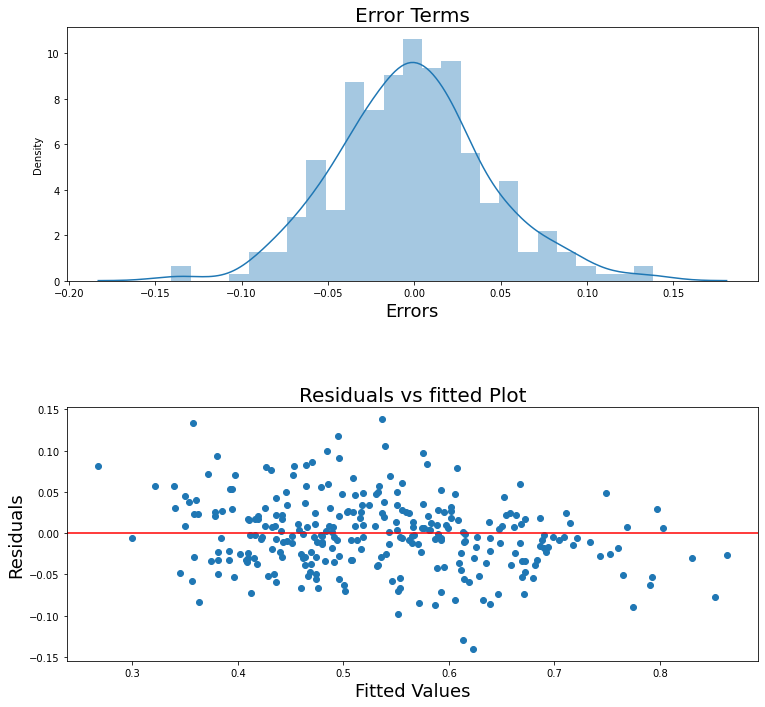

In [116]:
# Test the model for test set
y_test_pred = lm_final.predict(X_test_sm)
residuals = y_test_pred-y_test
# Plot the histogram of the error terms
fig, axs = plt.subplots(2,1,figsize=(12,8))
axs= axs.flatten()
sns.distplot((residuals), bins = 25, ax=axs[0])
axs[0].set_title('Error Terms', fontsize = 20)                  # Plot heading 
axs[0].set_xlabel('Errors', fontsize = 18)                         # X-label
axs[1].scatter(y_test_pred,residuals)
axs[1].axhline(0,color='r')
axs[1].set_xlabel('Fitted Values', fontsize = 18)   
axs[1].set_ylabel('Residuals', fontsize = 18)   
axs[1].set_title('Residuals vs fitted Plot', fontsize = 20)    
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=-0.2,hspace=0.5, wspace=0.5)

In [117]:
# residual of each feature
def plot_residuals(residuals, X, cols):
    """Plots Scatter plot between columns. and target"""
    li  = len(cols)
    n = int(np.ceil(np.sqrt(li)))
    n2 = int(np.ceil(li/n))
    fig, axs = plt.subplots(n2, n, figsize=(18,10))
    axs = axs.flatten()
    for ax in axs[li:]:
        ax.remove()
    for ax, col in zip(axs, cols):
        ax.scatter(x=X[col],y=residuals)
        ax.axhline(0,color='r')
        ax.set_xlabel(col)
        ax.set_ylabel('Residuals')
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,hspace=0.4, wspace=0.2)
    plt.suptitle(f'Residuals with Features')
    plt.tight_layout()

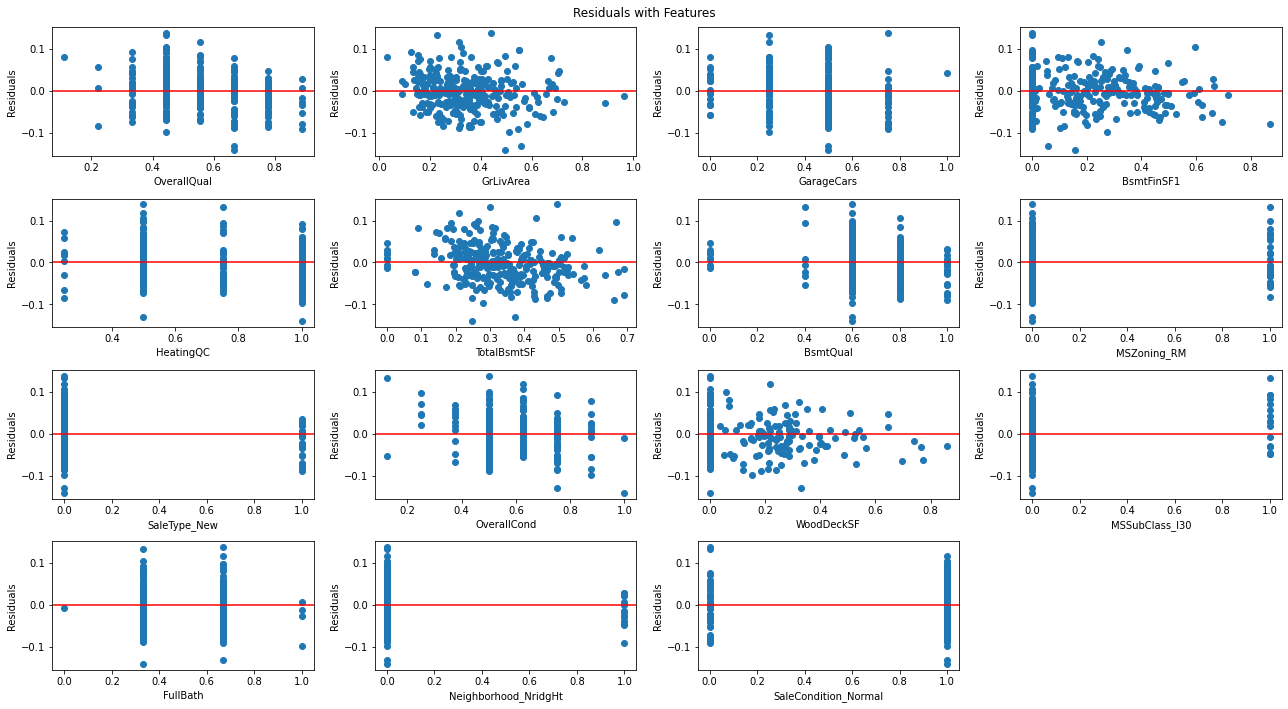

In [118]:
plot_residuals(residuals, X_test_sm, cols_final)

------------------------------------------------------------------------------------
<font color="green">**Insights**</font>

<font color="purple">
 - The residual analysis was done.<br>
 - The residuals have a reasonable normal distribution.<br>
 - The  residual vs fitted plot is homoscedastic.<br>
    
</font>

-------------------------------------------------------------------------------------

## 10 Conclusion

#### We have selected the lasso model with alpha=0.0015 as our final model. 
#### We have validated that assumptions of Linear Regression are met.
#### Our model has 15 parameters with a resonable r2 test score of 0.886.
#### The equation is :

#### The impact of each variable can be visualized as:

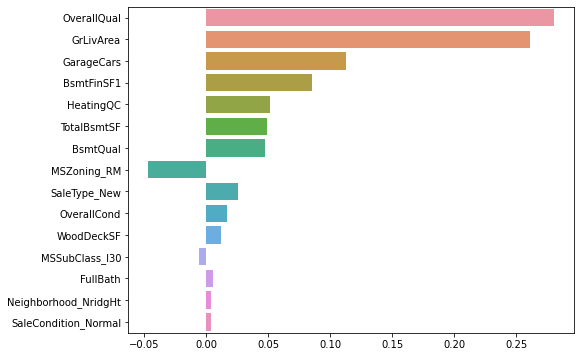

In [119]:
#plt.barh(x,y, color='Set1')
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(y=cols_final, x=coefs_final, ax=ax)

#### The contribution from first 4 variables is the maximum. 
- The OverallQual : overall rating of material and finish of the house,
- GrLivArea : Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- BsmtFinSF1: Type 1 finished square feet

#### The client should look for these features as they are a good indication of price.